<center><h1>Capstone Project: The Battle of Neighbourhoods  </h1></center>
<center><h2>Montreal  </h2></center>

Seif El Kilany <br>
March 8 2021 <br>

Import Libraries

In [78]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans



#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Montreal Postal Codes

Get data from wikipedia page

In [2]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_H'
source=requests.get(url).text
page_df= pd.read_html(source)

Confirm type of what we put in our df

In [3]:
type(page_df)

list

Confirm size of list

In [4]:
len(page_df)

4

Check what the 4 items look like

In [5]:
page_df

[                                    0                                 1  \
 0                     H0ANot assigned            H1APointe-aux-Trembles   
 1                     H0BNot assigned                  H1BMontreal East   
 2                     H0CNot assigned  H1CRivière-des-PrairiesNortheast   
 3                     H0ENot assigned  H1ERivière-des-PrairiesSouthwest   
 4                     H0GNot assigned             H1GMontréal-NordNorth   
 5         H0HReserved0H0: Santa Claus             H1HMontréal-NordSouth   
 6                     H0JNot assigned                      H1JAnjouWest   
 7                     H0KNot assigned                      H1KAnjouEast   
 8                     H0LNot assigned                   H1LMercierNorth   
 9   H0MAkwesasne Region1A0: Akwesasne                    H1MMercierWest   
 10                    H0NNot assigned               H1NMercierSoutheast   
 11                   H0P Not assigned             H1PSaint-LéonardNorth   
 12         

Our table is in the first item in the list 

In [6]:
montreal_wiki_df= page_df[0]
montreal_wiki_df

0                                 1  \
0                     H0ANot assigned            H1APointe-aux-Trembles   
1                     H0BNot assigned                  H1BMontreal East   
2                     H0CNot assigned  H1CRivière-des-PrairiesNortheast   
3                     H0ENot assigned  H1ERivière-des-PrairiesSouthwest   
4                     H0GNot assigned             H1GMontréal-NordNorth   
5         H0HReserved0H0: Santa Claus             H1HMontréal-NordSouth   
6                     H0JNot assigned                      H1JAnjouWest   
7                     H0KNot assigned                      H1KAnjouEast   
8                     H0LNot assigned                   H1LMercierNorth   
9   H0MAkwesasne Region1A0: Akwesasne                    H1MMercierWest   
10                    H0NNot assigned               H1NMercierSoutheast   
11                   H0P Not assigned             H1PSaint-LéonardNorth   
12                    H0RNot assigned              H1RSaint-LéonardWest   
13                    H0SNot assigned         H1SSaint-LéonardSoutheast   
14                    H0TNot assigned                  H1TRosemontNorth   
15                    H0VNot assigned                    H1VMaisonneuve   
16                    H0WNot assigned                      H1WHochelaga   
17                    H0XNot assigned                H1XRosemontCentral   
18                    H0YNot assigned                  H1YRosemontSouth   
19                    H0ZNot assigned               H1ZSaint-MichelWest   

                                     2  \
0                 H2ASaint-Michel,East   
1                     H2BAhuntsicNorth   
2                   H2CAhuntsicCentral   
3                 H2EVillerayNortheast   
4            H2GPetite-PatrieNortheast   
5           H2HPlateau Mont-RoyalNorth   
6   H2JPlateau Mont-RoyalNorth Central   
7                   H2KCentre-SudNorth   
8                   H2LCentre-SudSouth   
9                      H2MAhuntsicEast   
10                H2NAhuntsicSoutheast   
11                     H2PVillerayWest   
12                H2RVilleraySoutheast   
13           H2SPetite-PatrieSouthwest   
14           H2TPlateau Mont-RoyalWest   
15                        H2VOutremont   
16  H2WPlateau Mont-RoyalSouth Central   
17      H2XPlateau Mont-RoyalSoutheast   
18                     H2YOld Montreal   
19       H2ZDowntown MontrealNortheast   

                                                    3  \
0       H3ADowntown Montreal North(McGill University)   
1                            H3BDowntown MontrealEast   
2   H3CGriffintown(Includes Île Notre-Dame & Île S...   
3                                 H3EL'Île-Des-Soeurs   
4   H3GDowntown MontrealSoutheast (Concordia Unive...   
5                       H3HDowntown MontrealSouthwest   
6                                 H3JPetite-Bourgogne   
7                             H3KPointe-Saint-Charles   
8                                H3LAhuntsicSouthwest   
9                            H3MCartiervilleNortheast   
10                                  H3NParc-Extension   
11                                H3PMount RoyalNorth   
12                              H3RMount RoyalCentral   
13                            H3SCôte-des-NeigesNorth   
14                        H3TCôte-des-NeigesNortheast   
15                             H3VCôte-des-NeigesEast   
16                        H3WCôte-des-NeigesSouthwest   
17                      H3XHampstead / Côte Saint-Luc   
18                                  H3YWestmountNorth   
19                                  H3ZWestmountSouth   

                                  4                     5  \
0   H4ANotre-Dame-de-GrâceNortheast  H5APlace Bonaventure   
1   H4BNotre-Dame-de-GrâceSouthwest   H5BPlace Desjardins   
2                    H4CSaint-Henri       H5CNot assigned   
3                    H4EVille Émard       H5ENot assigned   
4                    H4GVerdunNorth       H5GNot assigned   
5            

Data is not in an organized table, so some manipulation is needed to arrive at a clean view.

First, stack all table cells in one column

In [7]:
montreal_df=montreal_wiki_df.stack().reset_index()
montreal_df

level_0  level_1                                                  0
0          0        0                                    H0ANot assigned
1          0        1                             H1APointe-aux-Trembles
2          0        2                               H2ASaint-Michel,East
3          0        3      H3ADowntown Montreal North(McGill University)
4          0        4                    H4ANotre-Dame-de-GrâceNortheast
5          0        5                               H5APlace Bonaventure
6          0        6                                    H7ADuvernay-Est
7          0        7                                    H8ANot assigned
8          0        8                    H9ADollard-des-OrmeauxNorthwest
9          1        0                                    H0BNot assigned
10         1        1                                   H1BMontreal East
11         1        2                                   H2BAhuntsicNorth
12         1        3                           H3BDowntown MontrealEast
13         1        4                    H4BNotre-Dame-de-GrâceSouthwest
14         1        5                                H5BPlace Desjardins
15         1        6                                  H7BSaint-François
16         1        7                                    H8BNot assigned
17         1        8                         H9BDollard-des-OrmeauxEast
18         2        0                                    H0CNot assigned
19         2        1                   H1CRivière-des-PrairiesNortheast
20         2        2                                 H2CAhuntsicCentral
21         2        3  H3CGriffintown(Includes Île Notre-Dame & Île S...
22         2        4                                     H4CSaint-Henri
23         2        5                                    H5CNot assigned
24         2        6                           H7CSaint-Vincent-de-Paul
25         2        7                                    H8CNot assigned
26         2        8                           H9CL'Île-BizardNortheast
27         3        0                                    H0ENot assigned
28         3        1                   H1ERivière-des-PrairiesSouthwest
29         3        2                               H2EVillerayNortheast
30         3        3                                H3EL'Île-Des-Soeurs
31         3        4                                     H4EVille Émard
32         3        5                                    H5ENot assigned
33         3        6                                        H7EDuvernay
34         3        7                                    H8ENot assigned
35         3        8                           H9EL'Île-BizardSouthwest
36         4        0                                    H0GNot assigned
37         4        1                              H1GMontréal-NordNorth
38         4        2                          H2GPetite-PatrieNortheast
39         4        3  H3GDowntown MontrealSoutheast (Concordia Unive...
40         4        4                                     H4GVerdunNorth
41         4        5                                    H5GNot assigned
42         4        6                                       H7GPont-Viau
43         4        7                                    H8GNot assigned
44         4        8                    H9GDollard-des-OrmeauxSouthwest
45         5        0                        H0HReserved0H0: Santa Claus
46         5        1                              H1HMontréal-NordSouth
47         5        2                         H2HPlateau Mont-RoyalNorth
48         5        3                      H3HDowntown MontrealSouthwest
49         5        4                                     H4HVerdunSouth
50         5        5                                    H5HNot assigned
51         5        6                                     H7HAuteuilWest
52         5        7                                    H8HNot assigned
53         5        8                  H9HSainte-Geneviève / Pi

Second, strip postal code and neighbourhood names out into separate columns and drop the unecassry columns.

In [8]:
montreal_df['Postal Code']= montreal_df[0].str[:3]
montreal_df['Neighbourhood']=montreal_df[0].str[3:]
montreal_df.drop(columns=['level_0','level_1'], inplace=True)
montreal_df

0 Postal Code  \
0                                      H0ANot assigned         H0A   
1                               H1APointe-aux-Trembles         H1A   
2                                 H2ASaint-Michel,East         H2A   
3        H3ADowntown Montreal North(McGill University)         H3A   
4                      H4ANotre-Dame-de-GrâceNortheast         H4A   
5                                 H5APlace Bonaventure         H5A   
6                                      H7ADuvernay-Est         H7A   
7                                      H8ANot assigned         H8A   
8                      H9ADollard-des-OrmeauxNorthwest         H9A   
9                                      H0BNot assigned         H0B   
10                                    H1BMontreal East         H1B   
11                                    H2BAhuntsicNorth         H2B   
12                            H3BDowntown MontrealEast         H3B   
13                     H4BNotre-Dame-de-GrâceSouthwest         H4B   
14                                 H5BPlace Desjardins         H5B   
15                                   H7BSaint-François         H7B   
16                                     H8BNot assigned         H8B   
17                          H9BDollard-des-OrmeauxEast         H9B   
18                                     H0CNot assigned         H0C   
19                    H1CRivière-des-PrairiesNortheast         H1C   
20                                  H2CAhuntsicCentral         H2C   
21   H3CGriffintown(Includes Île Notre-Dame & Île S...         H3C   
22                                      H4CSaint-Henri         H4C   
23                                     H5CNot assigned         H5C   
24                            H7CSaint-Vincent-de-Paul         H7C   
25                                     H8CNot assigned         H8C   
26                            H9CL'Île-BizardNortheast         H9C   
27                                     H0ENot assigned         H0E   
28                    H1ERivière-des-PrairiesSouthwest         H1E   
29                                H2EVillerayNortheast         H2E   
30                                 H3EL'Île-Des-Soeurs         H3E   
31                                      H4EVille Émard         H4E   
32                                     H5ENot assigned         H5E   
33                                         H7EDuvernay         H7E   
34                                     H8ENot assigned         H8E   
35                            H9EL'Île-BizardSouthwest         H9E   
36                                     H0GNot assigned         H0G   
37                               H1GMontréal-NordNorth         H1G   
38                           H2GPetite-PatrieNortheast         H2G   
39   H3GDowntown MontrealSoutheast (Concordia Unive...         H3G   
40                                      H4GVerdunNorth         H4G   
41                                     H5GNot assigned         H5G   
42                                        H7GPont-Viau         H7G   
43                                     H8GNot assigned         H8G   
44                     H9GDollard-des-OrmeauxSouthwest         H9G   
45                         H0HReserved0H0: Santa Claus         H0H   
46                               H1HMontréal-NordSouth         H1H   
47                          H2HPlateau Mont-RoyalNorth         H2H   
48                       H3HDowntown MontrealSouthwest         H3H   
49                                      H4HVerdunSouth         H4H   
50                                     H5HNot assigned         H5H   
51                                      H7HAuteuilWest         H7H   
52                                     H8HNot assigned         H8H   
53                   H9HSainte-Geneviève / Pierrefonds         H9H   
54                                     H0JNot assigned         H0J   
55                                        H1JAnjouWest         H1J   
56                  H2JPlateau Mont-RoyalNorth Central         

Third, we dont need the original combined column anymore.

In [9]:
montreal_df.drop(columns=[0], inplace=True)
montreal_df

Postal Code                                      Neighbourhood
0           H0A                                       Not assigned
1           H1A                                Pointe-aux-Trembles
2           H2A                                  Saint-Michel,East
3           H3A         Downtown Montreal North(McGill University)
4           H4A                       Notre-Dame-de-GrâceNortheast
5           H5A                                  Place Bonaventure
6           H7A                                       Duvernay-Est
7           H8A                                       Not assigned
8           H9A                       Dollard-des-OrmeauxNorthwest
9           H0B                                       Not assigned
10          H1B                                      Montreal East
11          H2B                                      AhuntsicNorth
12          H3B                              Downtown MontrealEast
13          H4B                       Notre-Dame-de-GrâceSouthwest
14          H5B                                   Place Desjardins
15          H7B                                     Saint-François
16          H8B                                       Not assigned
17          H9B                            Dollard-des-OrmeauxEast
18          H0C                                       Not assigned
19          H1C                      Rivière-des-PrairiesNortheast
20          H2C                                    AhuntsicCentral
21          H3C  Griffintown(Includes Île Notre-Dame & Île Sain...
22          H4C                                        Saint-Henri
23          H5C                                       Not assigned
24          H7C                              Saint-Vincent-de-Paul
25          H8C                                       Not assigned
26          H9C                              L'Île-BizardNortheast
27          H0E                                       Not assigned
28          H1E                      Rivière-des-PrairiesSouthwest
29          H2E                                  VillerayNortheast
30          H3E                                   L'Île-Des-Soeurs
31          H4E                                        Ville Émard
32          H5E                                       Not assigned
33          H7E                                           Duvernay
34          H8E                                       Not assigned
35          H9E                              L'Île-BizardSouthwest
36          H0G                                       Not assigned
37          H1G                                 Montréal-NordNorth
38          H2G                             Petite-PatrieNortheast
39          H3G  Downtown MontrealSoutheast (Concordia University)
40          H4G                                        VerdunNorth
41          H5G                                       Not assigned
42          H7G                                          Pont-Viau
43          H8G                                       Not assigned
44          H9G                       Dollard-des-OrmeauxSouthwest
45          H0H                           Reserved0H0: Santa Claus
46          H1H                                 Montréal-NordSouth
47          H2H                            Plateau Mont-RoyalNorth
48          H3H                         Downtown MontrealSouthwest
49          H4H                                        VerdunSouth
50          H5H                                       Not assigned
51          H7H                                        AuteuilWest
52          H8H                                       Not assigned
53          H9H                     Sainte-Geneviève / Pierrefonds
54          H0J                                       Not assigned
55          H1J                                          AnjouWest
56          H2J                    Plateau Mont-RoyalNorth Central
57          H3J                                   Petite-Bourgogne
58          H4J                                Cart

Fourth and last manipulation, drop all 'not assigned' postal codes as well as the one reservered for Santa Claus for the kids.

In [10]:
montreal_df.drop(montreal_df[montreal_df['Neighbourhood']=='Not assigned'].index, inplace=True)
montreal_df.drop(montreal_df[montreal_df['Neighbourhood']=='Reserved0H0: Santa Claus'].index, inplace=True)
montreal_df

Postal Code                                      Neighbourhood
1           H1A                                Pointe-aux-Trembles
2           H2A                                  Saint-Michel,East
3           H3A         Downtown Montreal North(McGill University)
4           H4A                       Notre-Dame-de-GrâceNortheast
5           H5A                                  Place Bonaventure
6           H7A                                       Duvernay-Est
8           H9A                       Dollard-des-OrmeauxNorthwest
10          H1B                                      Montreal East
11          H2B                                      AhuntsicNorth
12          H3B                              Downtown MontrealEast
13          H4B                       Notre-Dame-de-GrâceSouthwest
14          H5B                                   Place Desjardins
15          H7B                                     Saint-François
17          H9B                            Dollard-des-OrmeauxEast
19          H1C                      Rivière-des-PrairiesNortheast
20          H2C                                    AhuntsicCentral
21          H3C  Griffintown(Includes Île Notre-Dame & Île Sain...
22          H4C                                        Saint-Henri
24          H7C                              Saint-Vincent-de-Paul
26          H9C                              L'Île-BizardNortheast
28          H1E                      Rivière-des-PrairiesSouthwest
29          H2E                                  VillerayNortheast
30          H3E                                   L'Île-Des-Soeurs
31          H4E                                        Ville Émard
33          H7E                                           Duvernay
35          H9E                              L'Île-BizardSouthwest
37          H1G                                 Montréal-NordNorth
38          H2G                             Petite-PatrieNortheast
39          H3G  Downtown MontrealSoutheast (Concordia University)
40          H4G                                        VerdunNorth
42          H7G                                          Pont-Viau
44          H9G                       Dollard-des-OrmeauxSouthwest
46          H1H                                 Montréal-NordSouth
47          H2H                            Plateau Mont-RoyalNorth
48          H3H                         Downtown MontrealSouthwest
49          H4H                                        VerdunSouth
51          H7H                                        AuteuilWest
53          H9H                     Sainte-Geneviève / Pierrefonds
55          H1J                                          AnjouWest
56          H2J                    Plateau Mont-RoyalNorth Central
57          H3J                                   Petite-Bourgogne
58          H4J                                CartiervilleCentral
60          H7J                                   AuteuilNortheast
62          H9J                                           Kirkland
64          H1K                                          AnjouEast
65          H2K                                    Centre-SudNorth
66          H3K                               Pointe-Saint-Charles
67          H4K                              CartiervilleSouthwest
69          H7K                                       AuteuilSouth
71          H9K                                         Senneville
73          H1L                                       MercierNorth
74          H2L                                    Centre-SudSouth
75          H3L                                  AhuntsicSouthwest
76          H4L                       Saint-LaurentInner Northeast
78          H7L                                        Sainte-Rose
81          H0M                     Akwesasne Region1A0: Akwesasne
82          H1M                                        MercierWest
83          H2M                                       AhuntsicEast
84          H3M                              Cartie

In [11]:
montreal_df.shape

(123, 2)

In [12]:
print("DF Shape {} and number of unique postal code entries {} . ".format(montreal_df.shape , len(montreal_df['Postal Code'].unique() )))

DF Shape (123, 2) and number of unique postal code entries 123 . 


## Montreal latitiude and longitude coordinates

 Get coordinates for each neighbourhood using Geocoder Python package

In [47]:
import geocoder # import geocoder

In [ ]:
"""
#for pc in montreal_df['Postal Code']:
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Montreal, Quebec'.format('H3G'))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

"""

After letting the geocoder run for over an hour with no outcome, I had to look for the coordinates elsewhere.
So I found a list of all Canadian postal codes and coordinates at http://download.geonames.org/export/zip/

Its a zip file, so we will first import libraries to help with upzipping

In [13]:
from zipfile import ZipFile 
from io import BytesIO
print('Libraries imported.')

Libraries imported.


Get the zip file and check what files are in it

In [14]:
zurl= 'http://download.geonames.org/export/zip/CA.zip'
zfile= requests.get(zurl)

# unzip the content
zfolder = ZipFile(BytesIO(zfile.content))
print(zfolder.namelist())


['readme.txt', 'CA.txt']


Lets check out the readme file first

In [15]:
with zfolder.open(zfolder.namelist()[0], 'r') as RMfile:     
    rm_df = pd.read_csv(RMfile)

rm_df

Readme for GeoNames Postal Code files :
allCountries.zip: all supported countries           for the UK only the outwards codes   the UK total codes are in GB_full.csv.zip 
GB_full.csv.zip the full codes for the UK           ca 1.7 mio rows                                                             NaN
<iso countrycode>: country specific subset also... NaN                                                                          NaN
This work is licensed under a Creative Commons ... NaN                                                                          NaN
This means you can use the dump as long as you ... NaN                                                                          NaN
see http://creativecommons.org/licenses/by/3.0/    NaN                                                                          NaN
UK (GB_full.csv.zip): Contains Royal Mail data ... NaN                                                                          NaN
The Data is provided "as is" without warranty o...  timeliness or completeness.                                                 NaN
This readme describes the GeoNames Postal Code ... NaN                                                                          NaN
The main GeoNames gazetteer data extract is her... NaN                                                                          NaN
Supported countries: nearly 100 countries are c... NaN                                                                          NaN
For many countries lat/lng are determined with ... NaN                                                                          NaN
using administrative divisions and numerical vi... NaN                                                                          NaN
For postal codes and place name for which no co... NaN                                                                          NaN
lat/lng of 'neighbouring' postal codes is calcu... NaN                                                                          NaN
Please let us know if you find any errors in th... NaN                                                                          NaN
For Canada we have only the first letters of th... NaN                                                                          NaN
For Chile we have only the first digits of the ... NaN                                                                          NaN
For Ireland we have only the first letters of t... NaN                                                                          NaN
For Malta we have only the first letters of the... NaN                                                                          NaN
The Argentina data file contains the first 5 po... NaN                                                                          NaN
For Brazil only major postal codes are availabl... NaN                                                                          NaN
The data format is tab-delimited text in utf8 e...  with the following fields :                                                 NaN
country code      : iso country code                2 characters                                                                NaN
postal code       : varchar(20)                    NaN                                                                          NaN
place name        : varchar(180)                   NaN                                                                          NaN
admin name1       : 1. order subdivision (state... NaN                                                                          NaN
admin code1       : 1. order subdivision (state... NaN                                                                          NaN
admin name2       : 2. order subdivision (count... NaN                                                                          NaN
admin code2       : 2. order subdivision (count... NaN                                                                          NaN


We now know that our the data we want is in  CA text file that is tab delimited.

In [16]:
with zfolder.open(zfolder.namelist()[1], 'r') as CAfile:     
    ca_df = pd.read_csv(CAfile, delimiter='\t', header=None)

In [17]:
ca_df

0    1                                                  2   \
0     CA  T0A                         Eastern Alberta (St. Paul)   
1     CA  T0B                        Wainwright Region (Tofield)   
2     CA  T0C                         Central Alberta (Stettler)   
3     CA  T0E                           Western Alberta (Jasper)   
4     CA  T0G                 North Central Alberta (Slave Lake)   
5     CA  T0H                  Northwestern Alberta (High Level)   
6     CA  T0J                  Southeastern Alberta (Drumheller)   
7     CA  T0K             International Border Region (Cardston)   
8     CA  T0L                    Kananaskis Country (Claresholm)   
9     CA  T0M                         Central Foothills (Sundre)   
10    CA  T0P              Northeastern Alberta (Fort Chipewyan)   
11    CA  T0V                      Remote Northeast (Fitzgerald)   
12    CA  T1A                               Medicine Hat Central   
13    CA  T1B                                 Medicine Hat South   
14    CA  T1C                                 Medicine Hat North   
15    CA  T1G                                              Taber   
16    CA  T1H                                   Lethbridge North   
17    CA  T1J                        Lethbridge West and Central   
18    CA  T1K                               Lethbridge Southeast   
19    CA  T1L                                              Banff   
20    CA  T1M                                           Coaldale   
21    CA  T1P                                         Strathmore   
22    CA  T1R                                             Brooks   
23    CA  T1S                                            Okotoks   
24    CA  T1V                                         High River   
25    CA  T1W                                            Canmore   
26    CA  T1X                                        Chestermere   
27    CA  T1Y       Calgary (Rundle / Whitehorn / Monterey Park)   
28    CA  T1Z                                         Rocky View   
29    CA  T2A          Calgary (Penbrooke Meadows / Marlborough)   
30    CA  T2B         Calgary (Forest Lawn / Dover / Erin Woods)   
31    CA  T2C  Calgary (Lynnwood Ridge / Ogden / Foothills In...   
32    CA  T2E       Calgary (Bridgeland / Greenview / Zoo / YYC)   
33    CA  T2G  Calgary (Inglewood / Burnsland / Chinatown / E...   
34    CA  T2H             Calgary (Highfield / Burns Industrial)   
35    CA  T2J  Calgary (Queensland Downs / Lake Bonavista / W...   
36    CA  T2K                    Calgary (Thornecliffe / Tuxedo)   
37    CA  T2L      Calgary (Brentwood / Collingwood / Nose Hill)   
38    CA  T2M  Calgary (Mount Pleasant / Capitol Hill / Banff...   
39    CA  T2N  Calgary (Kensington / Westmont / Parkdale / Un...   
40    CA  T2P              Calgary (City Centre / Calgary Tower)   
41    CA  T2R           Calgary (Connaught / West Victoria Park)   
42    CA  T2S  Calgary (Elbow Park / Britannia / Parkhill / M...   
43    CA  T2T     Calgary South (Altadore / Bankview / Richmond)   
44    CA  T2V  Calgary (Oak Ridge / Haysboro / Kingsland / Wi...   
45    CA  T2W                      Calgary (Braeside / Woodbine)   
46    CA  T2X                     Calgary (Midnapore / Sundance)   
47    CA  T2Y  Calgary (Millrise / Somerset / Bridlewood / Ev...   
48    CA  T2Z  Calgary (Douglas Glen / McKenzie Lake / Copper...   
49    CA  T3A  Calgary (Dalhousie / Edgemont / Hamptons / Hid...   
50    CA  T3B  Calgary (Montgomery / Bowness / Silver Springs...   
51    CA  T3C  Calgary (Rosscarrock / Wildwood / Shaganappi /...   
52    CA  T3E  Calgary (Lakeview / Glendale / Killarney / Gla...   
53    CA  T3G  Calgary (Hawkwood / Arbour Lake / Royal Oak / ...   
54    CA  T3H  Calgary (Discovery Ridge / Signal Hill / Aspen...   
55    CA  T3J  Calgary (Martindale / Taradale / Falconridge /...   
56    CA  T3K  Calgary (Sandstone / Harvest Hills / Coventry ...   
57    CA  T3L                   Calgary (Tuscany / Scenic Acre

Now we manipulate the CA.df to arrive at the postal codes we want

In [18]:
ca_df.drop(columns=[0 ,5,6,7,8,11], inplace=True)
ca_df

1                                                  2   \
0     T0A                         Eastern Alberta (St. Paul)   
1     T0B                        Wainwright Region (Tofield)   
2     T0C                         Central Alberta (Stettler)   
3     T0E                           Western Alberta (Jasper)   
4     T0G                 North Central Alberta (Slave Lake)   
5     T0H                  Northwestern Alberta (High Level)   
6     T0J                  Southeastern Alberta (Drumheller)   
7     T0K             International Border Region (Cardston)   
8     T0L                    Kananaskis Country (Claresholm)   
9     T0M                         Central Foothills (Sundre)   
10    T0P              Northeastern Alberta (Fort Chipewyan)   
11    T0V                      Remote Northeast (Fitzgerald)   
12    T1A                               Medicine Hat Central   
13    T1B                                 Medicine Hat South   
14    T1C                                 Medicine Hat North   
15    T1G                                              Taber   
16    T1H                                   Lethbridge North   
17    T1J                        Lethbridge West and Central   
18    T1K                               Lethbridge Southeast   
19    T1L                                              Banff   
20    T1M                                           Coaldale   
21    T1P                                         Strathmore   
22    T1R                                             Brooks   
23    T1S                                            Okotoks   
24    T1V                                         High River   
25    T1W                                            Canmore   
26    T1X                                        Chestermere   
27    T1Y       Calgary (Rundle / Whitehorn / Monterey Park)   
28    T1Z                                         Rocky View   
29    T2A          Calgary (Penbrooke Meadows / Marlborough)   
30    T2B         Calgary (Forest Lawn / Dover / Erin Woods)   
31    T2C  Calgary (Lynnwood Ridge / Ogden / Foothills In...   
32    T2E       Calgary (Bridgeland / Greenview / Zoo / YYC)   
33    T2G  Calgary (Inglewood / Burnsland / Chinatown / E...   
34    T2H             Calgary (Highfield / Burns Industrial)   
35    T2J  Calgary (Queensland Downs / Lake Bonavista / W...   
36    T2K                    Calgary (Thornecliffe / Tuxedo)   
37    T2L      Calgary (Brentwood / Collingwood / Nose Hill)   
38    T2M  Calgary (Mount Pleasant / Capitol Hill / Banff...   
39    T2N  Calgary (Kensington / Westmont / Parkdale / Un...   
40    T2P              Calgary (City Centre / Calgary Tower)   
41    T2R           Calgary (Connaught / West Victoria Park)   
42    T2S  Calgary (Elbow Park / Britannia / Parkhill / M...   
43    T2T     Calgary South (Altadore / Bankview / Richmond)   
44    T2V  Calgary (Oak Ridge / Haysboro / Kingsland / Wi...   
45    T2W                      Calgary (Braeside / Woodbine)   
46    T2X                     Calgary (Midnapore / Sundance)   
47    T2Y  Calgary (Millrise / Somerset / Bridlewood / Ev...   
48    T2Z  Calgary (Douglas Glen / McKenzie Lake / Copper...   
49    T3A  Calgary (Dalhousie / Edgemont / Hamptons / Hid...   
50    T3B  Calgary (Montgomery / Bowness / Silver Springs...   
51    T3C  Calgary (Rosscarrock / Wildwood / Shaganappi /...   
52    T3E  Calgary (Lakeview / Glendale / Killarney / Gla...   
53    T3G  Calgary (Hawkwood / Arbour Lake / Royal Oak / ...   
54    T3H  Calgary (Discovery Ridge / Signal Hill / Aspen...   
55    T3J  Calgary (Martindale / Taradale / Falconridge /...   
56    T3K  Calgary (Sandstone / Harvest Hills / Coventry ...   
57    T3L                   Calgary (Tuscany / Scenic Acres)   
58    T3M                                 Calgary (Cranston)   
59    T3N                                  Calgary Northeast   
60    T3P                            Calgary (Symons Valley)   
61    T3R                              

In [19]:
ca_df.rename(columns={1: 'Postal Code', 2: 'Place Name', 3: 'Province',  4:'Province Code' , 9:'Latitude', 10:'Longitude'}, inplace=True)
ca_df


Postal Code                                         Place Name  \
0            T0A                         Eastern Alberta (St. Paul)   
1            T0B                        Wainwright Region (Tofield)   
2            T0C                         Central Alberta (Stettler)   
3            T0E                           Western Alberta (Jasper)   
4            T0G                 North Central Alberta (Slave Lake)   
5            T0H                  Northwestern Alberta (High Level)   
6            T0J                  Southeastern Alberta (Drumheller)   
7            T0K             International Border Region (Cardston)   
8            T0L                    Kananaskis Country (Claresholm)   
9            T0M                         Central Foothills (Sundre)   
10           T0P              Northeastern Alberta (Fort Chipewyan)   
11           T0V                      Remote Northeast (Fitzgerald)   
12           T1A                               Medicine Hat Central   
13           T1B                                 Medicine Hat South   
14           T1C                                 Medicine Hat North   
15           T1G                                              Taber   
16           T1H                                   Lethbridge North   
17           T1J                        Lethbridge West and Central   
18           T1K                               Lethbridge Southeast   
19           T1L                                              Banff   
20           T1M                                           Coaldale   
21           T1P                                         Strathmore   
22           T1R                                             Brooks   
23           T1S                                            Okotoks   
24           T1V                                         High River   
25           T1W                                            Canmore   
26           T1X                                        Chestermere   
27           T1Y       Calgary (Rundle / Whitehorn / Monterey Park)   
28           T1Z                                         Rocky View   
29           T2A          Calgary (Penbrooke Meadows / Marlborough)   
30           T2B         Calgary (Forest Lawn / Dover / Erin Woods)   
31           T2C  Calgary (Lynnwood Ridge / Ogden / Foothills In...   
32           T2E       Calgary (Bridgeland / Greenview / Zoo / YYC)   
33           T2G  Calgary (Inglewood / Burnsland / Chinatown / E...   
34           T2H             Calgary (Highfield / Burns Industrial)   
35           T2J  Calgary (Queensland Downs / Lake Bonavista / W...   
36           T2K                    Calgary (Thornecliffe / Tuxedo)   
37           T2L      Calgary (Brentwood / Collingwood / Nose Hill)   
38           T2M  Calgary (Mount Pleasant / Capitol Hill / Banff...   
39           T2N  Calgary (Kensington / Westmont / Parkdale / Un...   
40           T2P              Calgary (City Centre / Calgary Tower)   
41           T2R           Calgary (Connaught / West Victoria Park)   
42           T2S  Calgary (Elbow Park / Britannia / Parkhill / M...   
43           T2T     Calgary South (Altadore / Bankview / Richmond)   
44           T2V  Calgary (Oak Ridge / Haysboro / Kingsland / Wi...   
45           T2W                      Calgary (Braeside / Woodbine)   
46           T2X                     Calgary (Midnapore / Sundance)   
47           T2Y  Calgary (Millrise / Somerset / Bridlewood / Ev...   
48           T2Z  Calgary (Douglas Glen / McKenzie Lake / Copper...   
49           T3A  Calgary (Dalhousie / Edgemont / Hamptons / Hid...   
50           T3B  Calgary (Montgomery / Bowness / Silver Springs...   
51           T3C  Calgary (Rosscarrock / Wildwood / Shaganappi /...   
52           T3E  Calgary (Lakeview / Glendale / Killarney / Gla...   
53           T3G  Calgary (Hawkwood / Arbour Lake / Royal Oak / ...   
54           T3H  Calgary (Discovery Ridge / Signal Hill / Aspen...   
55           T3J  Calgary (Ma

In [20]:
mpcodes_df =pd.merge(montreal_df,ca_df, on='Postal Code')
mpcodes_df

Postal Code                                      Neighbourhood  \
0           H1A                                Pointe-aux-Trembles   
1           H2A                                  Saint-Michel,East   
2           H3A         Downtown Montreal North(McGill University)   
3           H4A                       Notre-Dame-de-GrâceNortheast   
4           H5A                                  Place Bonaventure   
5           H7A                                       Duvernay-Est   
6           H9A                       Dollard-des-OrmeauxNorthwest   
7           H1B                                      Montreal East   
8           H2B                                      AhuntsicNorth   
9           H3B                              Downtown MontrealEast   
10          H4B                       Notre-Dame-de-GrâceSouthwest   
11          H5B                                   Place Desjardins   
12          H7B                                     Saint-François   
13          H9B                            Dollard-des-OrmeauxEast   
14          H1C                      Rivière-des-PrairiesNortheast   
15          H2C                                    AhuntsicCentral   
16          H3C  Griffintown(Includes Île Notre-Dame & Île Sain...   
17          H4C                                        Saint-Henri   
18          H7C                              Saint-Vincent-de-Paul   
19          H9C                              L'Île-BizardNortheast   
20          H1E                      Rivière-des-PrairiesSouthwest   
21          H2E                                  VillerayNortheast   
22          H3E                                   L'Île-Des-Soeurs   
23          H4E                                        Ville Émard   
24          H7E                                           Duvernay   
25          H9E                              L'Île-BizardSouthwest   
26          H1G                                 Montréal-NordNorth   
27          H2G                             Petite-PatrieNortheast   
28          H3G  Downtown MontrealSoutheast (Concordia University)   
29          H4G                                        VerdunNorth   
30          H7G                                          Pont-Viau   
31          H9G                       Dollard-des-OrmeauxSouthwest   
32          H1H                                 Montréal-NordSouth   
33          H2H                            Plateau Mont-RoyalNorth   
34          H3H                         Downtown MontrealSouthwest   
35          H4H                                        VerdunSouth   
36          H7H                                        AuteuilWest   
37          H9H                     Sainte-Geneviève / Pierrefonds   
38          H1J                                          AnjouWest   
39          H2J                    Plateau Mont-RoyalNorth Central   
40          H3J                                   Petite-Bourgogne   
41          H4J                                CartiervilleCentral   
42          H7J                                   AuteuilNortheast   
43          H9J                                           Kirkland   
44          H1K                                          AnjouEast   
45          H2K                                    Centre-SudNorth   
46          H3K                               Pointe-Saint-Charles   
47          H4K                              CartiervilleSouthwest   
48          H7K                                       AuteuilSouth   
49          H9K                                         Senneville   
50          H1L                                       MercierNorth   
51          H2L                                    Centre-SudSouth   
52          H3L                                  AhuntsicSouthwest   
53          H4L                       Saint-LaurentInner Northeast   
54          H7L                                        Sainte-Rose   
55          H0M                     Akwesasne Region1A0: Akwesasne   
56          H1

In [21]:
mpcodes_df.shape

(122, 7)

## Clustering & Segmenting of Neighbourhoods

Getting coordinates for Montreal

In [22]:
address = 'Montreal, Quebec'

geolocator = Nominatim(user_agent="m_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montreal are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Montreal are 45.4972159, -73.6103642.


Define Foursquare Credentials and Version

In [23]:
CLIENT_ID = 'MPOJVSI1C4JE5ZSLC5IB1HDGIXOYME4DV3PPCFDMCJ24FAWE' # your Foursquare ID
CLIENT_SECRET = 'D4V1Y5TZA1PIHM4R4Q3GV4JVA3KL3KUZA32HRDTWV15PZCYD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MPOJVSI1C4JE5ZSLC5IB1HDGIXOYME4DV3PPCFDMCJ24FAWE
CLIENT_SECRET:D4V1Y5TZA1PIHM4R4Q3GV4JVA3KL3KUZA32HRDTWV15PZCYD


Lets get the top 100 venues of all neighbourhoods ( within a radius of 500m)

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT= 100  # limit of number of venues returned by Foursquare API
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
montreal_venues= getNearbyVenues(mpcodes_df['Neighbourhood'], mpcodes_df['Latitude'], mpcodes_df['Longitude'])

Pointe-aux-Trembles
Saint-Michel,East
Downtown Montreal North(McGill University)
Notre-Dame-de-GrâceNortheast
Place Bonaventure
Duvernay-Est
Dollard-des-OrmeauxNorthwest
Montreal East
AhuntsicNorth
Downtown MontrealEast
Notre-Dame-de-GrâceSouthwest
Place Desjardins
Saint-François
Dollard-des-OrmeauxEast
Rivière-des-PrairiesNortheast
AhuntsicCentral
Griffintown(Includes Île Notre-Dame & Île Sainte-Hélène)(Université de Montréal)
Saint-Henri
Saint-Vincent-de-Paul
L'Île-BizardNortheast
Rivière-des-PrairiesSouthwest
VillerayNortheast
L'Île-Des-Soeurs
Ville Émard
Duvernay
L'Île-BizardSouthwest
Montréal-NordNorth
Petite-PatrieNortheast
Downtown MontrealSoutheast (Concordia University)
VerdunNorth
Pont-Viau
Dollard-des-OrmeauxSouthwest
Montréal-NordSouth
Plateau Mont-RoyalNorth
Downtown MontrealSouthwest
VerdunSouth
AuteuilWest
Sainte-Geneviève / Pierrefonds
AnjouWest
Plateau Mont-RoyalNorth Central
Petite-Bourgogne
CartiervilleCentral
AuteuilNortheast
Kirkland
AnjouEast
Centre-SudNorth
Point

Checking size and data of the resulting df

In [26]:
print(montreal_venues.shape)
montreal_venues.head(20)


(1886, 7)


Neighbourhood  Neighbourhood Latitude  \
0                          Pointe-aux-Trembles                 45.6753   
1                          Pointe-aux-Trembles                 45.6753   
2                          Pointe-aux-Trembles                 45.6753   
3                            Saint-Michel,East                 45.5618   
4                            Saint-Michel,East                 45.5618   
5                            Saint-Michel,East                 45.5618   
6                            Saint-Michel,East                 45.5618   
7                            Saint-Michel,East                 45.5618   
8                            Saint-Michel,East                 45.5618   
9                            Saint-Michel,East                 45.5618   
10                           Saint-Michel,East                 45.5618   
11                           Saint-Michel,East                 45.5618   
12  Downtown Montreal North(McGill University)                 45.5040   
13  Downtown Montreal North(McGill University)                 45.5040   
14  Downtown Montreal North(McGill University)                 45.5040   
15  Downtown Montreal North(McGill University)                 45.5040   
16  Downtown Montreal North(McGill University)                 45.5040   
17  Downtown Montreal North(McGill University)                 45.5040   
18  Downtown Montreal North(McGill University)                 45.5040   
19  Downtown Montreal North(McGill University)                 45.5040   

    Neighbourhood Longitude                                  Venue  \
0                  -73.5016  Parc-nature de la Pointe-aux-Prairies   
1                  -73.5016           AMT Gare Pointe-aux-Trembles   
2                  -73.5016                    Parc Yves-Thériault   
3                  -73.5990                                Bar Zoe   
4                  -73.5990          Marché Aux Puces Saint-Michel   
5                  -73.5990               STM Station Saint-Michel   
6                  -73.5990                    Restaurant Kim Hour   
7                  -73.5990                           Petro-Canada   
8                  -73.5990                                L'Abyss   
9                  -73.5990                             Quan Bo De   
10                 -73.5990                    Café Resto Sidi Bou   
11                 -73.5990                     Dépanneur Beausoir   
12                 -73.5747   Hôtel Le Germain Montréal - NOW OPEN   
13                 -73.5747                                 Empire   
14                 -73.5747                 Mcgill University Park   
15                 -73.5747                       Café Humble Lion   
16                 -73.5747                             Second Cup   
17                 -73.5747                          Vua Sandwichs   
18                 -73.5747               Time Out Market Montréal   
19                 -73.5747                   NStyle Beauty Lounge   

    Venue Latitude  Venue Longitude                 Venue Category  
0        45.678834       -73.501162                           Park  
1        45.674882       -73.504908                  Train Station  
2        45.678675       -73.502037                           Park  
3        45.559673       -73.597542                    Karaoke Bar  
4        45.562502       -73.605079                    Flea Market  
5        45.559425       -73.599749                  Metro Station  
6        45.561836       -73.605112             Chinese Restaurant  
7        45.560984       -73.602396                    Gas Station  
8        45.560206       -73.600077               Toy / Game Store  
9        45.560656       -73.596357  Vegetarian / Vegan Restaurant  
10       45.562116       -73.595454      Middle Eastern Restaurant  
11       45.560852       -73.594313                         Market  
12       45.502524       -73.574383                          Hotel  
13       45.503952       -73.571840      

Checking how many venues for each neighbourhood

In [27]:
montreal_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  \
Neighbourhood                                                                
 Laval-sur-le-Lac                                                        3   
AhuntsicCentral                                                         18   
AhuntsicEast                                                             5   
AhuntsicNorth                                                            5   
AhuntsicSoutheast                                                       20   
AhuntsicSouthwest                                                       15   
AnjouEast                                                                5   
AnjouWest                                                                9   
AuteuilSouth                                                             7   
AuteuilWest                                                              4   
Beaconsfield                                                             4   
CartiervilleCentral                                                      4   
CartiervilleNortheast                                                   11   
CartiervilleSouthwest                                                    4   
Centre-SudNorth                                                         19   
Centre-SudSouth                                                         74   
ChomedeyNortheast                                                        4   
ChomedeyNorthwest                                                        5   
ChomedeySouth                                                            5   
Côte Saint-LucEast                                                       7   
Côte Saint-LucWest                                                       5   
Côte-des-NeigesEast                                                      4   
Côte-des-NeigesNorth                                                     7   
Côte-des-NeigesNortheast                                                 6   
Côte-des-NeigesSouthwest                                                13   
Dollard-des-OrmeauxEast                                                  9   
Dollard-des-OrmeauxNorthwest                                             2   
Dollard-des-OrmeauxSouthwest                                            18   
Dorval / L'Île-Dorval                                                    2   
DorvalOutskirts                                                          3   
Downtown Montreal North(McGill University)                              38   
Downtown MontrealEast                                                   65   
Downtown MontrealNortheast                                             100   
Downtown MontrealSoutheast (Concordia University)                      100   
Downtown MontrealSouthwest                                               6   
Duvernay                                                                 4   
Duvernay-Est                                                             4   
Fabreville                                                               6   
Griffintown(Includes Île Notre-Dame & Île Saint...                       9   
Hampstead / Côte Saint-Luc                                               4   
Hochelaga                                                               27   
Kirkland                                                                 3   
L'Île-BizardNortheast                                                    2   
L'Île-BizardSouthwest                                                    1   
L'Île-Des-Soeurs                                                         5   
LaSalleNorthwest                                                        17   
LaSalleSoutheast                                                         3   
LachineEast                                                              4   
LachineWest                                                              4   
Laval-des-Rapides                                                        4

In [28]:
montreal_venues.groupby('Neighbourhood').count().describe()

Neighbourhood Latitude  Neighbourhood Longitude       Venue  \
count              115.000000               115.000000  115.000000   
mean                16.400000                16.400000   16.400000   
std                 23.293249                23.293249   23.293249   
min                  1.000000                 1.000000    1.000000   
25%                  4.000000                 4.000000    4.000000   
50%                  6.000000                 6.000000    6.000000   
75%                 18.000000                18.000000   18.000000   
max                100.000000               100.000000  100.000000   

       Venue Latitude  Venue Longitude  Venue Category  
count      115.000000       115.000000      115.000000  
mean        16.400000        16.400000       16.400000  
std         23.293249        23.293249       23.293249  
min          1.000000         1.000000        1.000000  
25%          4.000000         4.000000        4.000000  
50%          6.000000         6.000000        6.000000  
75%         18.000000        18.000000       18.000000  
max        100.000000       100.000000      100.000000

Checking out Venue Categories. 

In [29]:
montreal_venues.groupby('Venue Category').count()

Neighbourhood  \
Venue Category                                            
Accessories Store                                     1   
Adult Boutique                                        1   
Airport Terminal                                      1   
American Restaurant                                   2   
Arepa Restaurant                                      1   
Art Gallery                                           9   
Art Museum                                            9   
Arts & Crafts Store                                   2   
Arts & Entertainment                                  2   
Asian Restaurant                                     19   
Athletics & Sports                                    5   
Auto Garage                                           1   
BBQ Joint                                             6   
Bagel Shop                                            5   
Bakery                                               51   
Bank                                                 14   
Bar                                                  43   
Baseball Field                                        2   
Basketball Court                                      2   
Bed & Breakfast                                       2   
Beer Bar                                              5   
Beer Store                                            4   
Bike Rental / Bike Share                              4   
Bistro                                                5   
Boat or Ferry                                         4   
Bookstore                                             8   
Boutique                                              5   
Boxing Gym                                            2   
Breakfast Spot                                       44   
Brewery                                               5   
Bubble Tea Shop                                       6   
Building                                              3   
Burger Joint                                         11   
Burmese Restaurant                                    1   
Burrito Place                                         1   
Bus Line                                              3   
Bus Station                                           2   
Bus Stop                                              5   
Business Service                                      6   
Butcher                                               3   
Café                                                108   
Cajun / Creole Restaurant                             1   
Cambodian Restaurant                                  1   
Candy Store                                           3   
Caribbean Restaurant                                  1   
Cheese Shop                                           4   
Chinese Restaurant                                   14   
Chocolate Shop                                        1   
Church                                                7   
Clothing Store                                       10   
Cocktail Bar                                         16   
Coffee Shop                                          48   
College Bookstore                                     1   
College Gym                                           1   
College Rec Center                                    1   
College Theater                                       1   
Comedy Club                                           4   
Comfort Food Restaurant                               4   
Concert Hall                                         13   
Construction & Landscaping                            8   
Convenience Store                                    27   
Cosmetics Shop                                        5   
Creperie                                              4   
Cupcake Shop                                          4   
Curling Ice                                           1   
Cycle Studio                                          2   
Dance Studio                  

In [30]:
montreal_venues.groupby('Venue Category').count().describe()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
count     261.000000              261.000000               261.000000   
mean        7.226054                7.226054                 7.226054   
std        12.468678               12.468678                12.468678   
min         1.000000                1.000000                 1.000000   
25%         1.000000                1.000000                 1.000000   
50%         3.000000                3.000000                 3.000000   
75%         7.000000                7.000000                 7.000000   
max       108.000000              108.000000               108.000000   

            Venue  Venue Latitude  Venue Longitude  
count  261.000000      261.000000       261.000000  
mean     7.226054        7.226054         7.226054  
std     12.468678       12.468678        12.468678  
min      1.000000        1.000000         1.000000  
25%      1.000000        1.000000         1.000000  
50%      3.000000        3.000000         3.000000  
75%      7.000000        7.000000         7.000000  
max    108.000000      108.000000       108.000000

### Analyze Neighbourhoods

In [31]:
# one hot encoding
montreal_onehot = pd.get_dummies(montreal_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
montreal_onehot['Neighbourhood'] = montreal_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [montreal_onehot.columns[-1]] + list(montreal_onehot.columns[:-1])
montreal_onehot = montreal_onehot[fixed_columns]

montreal_onehot.head()

Neighbourhood  Accessories Store  Adult Boutique  Airport Terminal  \
0  Pointe-aux-Trembles                  0               0                 0   
1  Pointe-aux-Trembles                  0               0                 0   
2  Pointe-aux-Trembles                  0               0                 0   
3    Saint-Michel,East                  0               0                 0   
4    Saint-Michel,East                  0               0                 0   

   American Restaurant  Arepa Restaurant  Art Gallery  Art Museum  \
0                    0                 0            0           0   
1                    0                 0            0           0   
2                    0                 0            0           0   
3                    0                 0            0           0   
4                    0                 0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Garage  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0                   0            0          0           0       0     0    0   
1                   0            0          0           0       0     0    0   
2                   0            0          0           0       0     0    0   
3                   0            0          0           0       0     0    0   
4                   0            0          0           0       0     0    0   

   Baseball Field  Basketball Court  Bed & Breakfast  Beer Bar  Beer Store  \
0               0                 0                0         0           0   
1               0                 0                0         0           0   
2               0                 0                0         0           0   
3               0                 0                0         0           0   
4               0                 0                0         0           0   

   Bike Rental / Bike Share  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                         0       0              0          0         0   
1                         0       0              0          0         0   
2                         0       0              0          0         0   
3                         0       0              0          0         0   
4                         0       0              0          0         0   

   Boxing Gym  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0           0               0        0                0         0   
1           0               0        0                0         0   
2           0               0        0                0         0   
3           0               0        0                0         0   
4           0               0        0                0         0   

   Burger Joint  Burmese Restaurant  Burrito Place  Bus Line  Bus Station  \
0             0                   0              0         0            0   
1             0                   0              0         0            0   
2             0                   0              0         0            0   
3             0                   0              0         0            0   
4             0                   0              0         0            0   

   Bus Stop  Business Service  Butcher  Café  Cajun / Creole Restaurant  \
0         0                 0        0     0                          0   
1         0                 0        0     0                          0   
2         0                 0        0     0                          0   
3         0                 0        0     0                          0   
4         0                 0        0     0                        

check new shape

In [32]:
montreal_onehot.shape

(1886, 262)

Grouping rows by neighbourhood and taking the mean of the frequency of occurance of each category

In [33]:
montreal_grouped = montreal_onehot.groupby('Neighbourhood').mean().reset_index()
montreal_grouped

Neighbourhood  Accessories Store  \
0                                     Laval-sur-le-Lac               0.00   
1                                      AhuntsicCentral               0.00   
2                                         AhuntsicEast               0.00   
3                                        AhuntsicNorth               0.00   
4                                    AhuntsicSoutheast               0.00   
5                                    AhuntsicSouthwest               0.00   
6                                            AnjouEast               0.00   
7                                            AnjouWest               0.00   
8                                         AuteuilSouth               0.00   
9                                          AuteuilWest               0.00   
10                                        Beaconsfield               0.00   
11                                 CartiervilleCentral               0.00   
12                               CartiervilleNortheast               0.00   
13                               CartiervilleSouthwest               0.00   
14                                     Centre-SudNorth               0.00   
15                                     Centre-SudSouth               0.00   
16                                   ChomedeyNortheast               0.00   
17                                   ChomedeyNorthwest               0.00   
18                                       ChomedeySouth               0.00   
19                                  Côte Saint-LucEast               0.00   
20                                  Côte Saint-LucWest               0.00   
21                                 Côte-des-NeigesEast               0.00   
22                                Côte-des-NeigesNorth               0.00   
23                            Côte-des-NeigesNortheast               0.00   
24                            Côte-des-NeigesSouthwest               0.00   
25                             Dollard-des-OrmeauxEast               0.00   
26                        Dollard-des-OrmeauxNorthwest               0.00   
27                        Dollard-des-OrmeauxSouthwest               0.00   
28                               Dorval / L'Île-Dorval               0.00   
29                                     DorvalOutskirts               0.00   
30          Downtown Montreal North(McGill University)               0.00   
31                               Downtown MontrealEast               0.00   
32                          Downtown MontrealNortheast               0.00   
33   Downtown MontrealSoutheast (Concordia University)               0.01   
34                          Downtown MontrealSouthwest               0.00   
35                                            Duvernay               0.00   
36                                        Duvernay-Est               0.00   
37                                          Fabreville               0.00   
38   Griffintown(Includes Île Notre-Dame & Île Sain...               0.00   
39                          Hampstead / Côte Saint-Luc               0.00   
40                                           Hochelaga               0.00   
41                                            Kirkland               0.00   
42                               L'Île-BizardNortheast               0.00   
43                               L'Île-BizardSouthwest               0.00   
44                                    L'Île-Des-Soeurs               0.00   
45                                    LaSalleNorthwest               0.00   
46                                    LaSalleSoutheast               0.00   
47                                         LachineEast               0.00   
48                                         LachineWest               0.00   
49                                   Laval-des-Rapides               0.00   
50                                         Maisonneuve               0.00   
51                                   

Confirming new shape of grouped df

In [34]:
montreal_grouped.shape

(115, 262)

Function to sort the venues in descending order

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create new df with the top 10 venues for each neighborhood, since there are way too many

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = montreal_grouped['Neighbourhood']

for ind in np.arange(montreal_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(montreal_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

Neighbourhood   1st Most Common Venue 2nd Most Common Venue  \
0   Laval-sur-le-Lac            Food Service            Steakhouse   
1    AhuntsicCentral                    Café    Italian Restaurant   
2       AhuntsicEast                    Park                  Pool   
3      AhuntsicNorth                Pharmacy         Grocery Store   
4  AhuntsicSoutheast  Furniture / Home Store    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Golf Course     Fish & Chips Shop           Event Space   
1         Grocery Store       Organic Grocery            Restaurant   
2    Athletics & Sports           Yoga Studio        Farmers Market   
3             Pet Store           Pizza Place    English Restaurant   
4        Clothing Store      Department Store        Sandwich Place   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0               Factory    Falafel Restaurant        Farmers Market   
1        Breakfast Spot           Cheese Shop           Coffee Shop   
2           Escape Room           Event Space               Factory   
3           Escape Room           Event Space               Factory   
4                  Bank                Bakery                  Park   

  9th Most Common Venue 10th Most Common Venue  
0  Fast Food Restaurant            Fish Market  
1                 Plaza                    Bar  
2    Falafel Restaurant      Fish & Chips Shop  
3    Falafel Restaurant            Yoga Studio  
4     Electronics Store         Breakfast Spot

### Clustering of Neighbourhoods


Determining number of clusters needed using the Elbow method

In [83]:
# Using the inertias function from Sklearn library

inertias = []
mappingX = {}
# Will iterate from 1 to 9 and calculate the inertia for each value of K
K = range(1, 10)
X= montreal_grouped.drop('Neighbourhood', 1)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    inertias.append(kmeanModel.inertia_)
 
    mappingX[k] = kmeanModel.inertia_
    

Visualizing the result fo the model fitting 

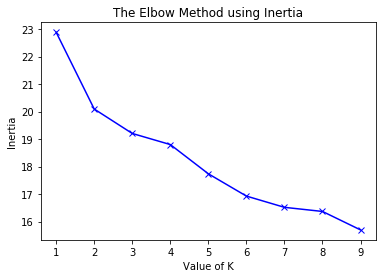

In [84]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Run k-means to cluster the neighborhood into 5 clusters

In [37]:
# set number of clusters
kclusters = 5

montreal_grouped_clustering = montreal_grouped.drop('Neighbourhood', 1)

# run k-means clustering 
# with initialzation method Kmeans++
# and n_init to run 40 times versus default of 10
kmeans = KMeans(init="k-means++", n_clusters=kclusters,n_init=40, random_state=0).fit(montreal_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30] 

array([3, 3, 2, 1, 3, 3, 0, 0, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       1, 3, 3, 3, 2, 3, 3, 3])

New df with clusters and top 10 venues for each neighbourhood

In [38]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

montreal_merged = mpcodes_df

# merge montreal_grouped with montreal_data to add latitude/longitude for each neighborhood
montreal_merged = montreal_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

montreal_merged.head() # check the last columns!

Postal Code                               Neighbourhood  \
0         H1A                         Pointe-aux-Trembles   
1         H2A                           Saint-Michel,East   
2         H3A  Downtown Montreal North(McGill University)   
3         H4A                Notre-Dame-de-GrâceNortheast   
4         H5A                           Place Bonaventure   

                      Place Name Province Province Code  Latitude  Longitude  \
0            Pointe-Aux-Trembles   Quebec            QC   45.6753   -73.5016   
1              Saint-Michel East   Quebec            QC   45.5618   -73.5990   
2        Downtown Montreal North   Quebec            QC   45.5040   -73.5747   
3  Notre-Dame-de-GrÔce Northeast   Quebec            QC   45.4717   -73.6149   
4              Place Bonaventure   Quebec            QC   45.4992   -73.5646   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             2.0                  Park         Train Station   
1             3.0      Toy / Game Store    Chinese Restaurant   
2             3.0                 Hotel           Coffee Shop   
3             3.0                  Café     Indian Restaurant   
4             3.0                 Plaza            Food Truck   

  3rd Most Common Venue      4th Most Common Venue  \
0     Food & Drink Shop                       Food   
1           Flea Market  Middle Eastern Restaurant   
2        Sandwich Place                       Café   
3                Bakery                  BBQ Joint   
4                Market                 Steakhouse   

           5th Most Common Venue 6th Most Common Venue  \
0                    Flower Shop           Flea Market   
1  Vegetarian / Vegan Restaurant         Metro Station   
2                    Pizza Place             Bookstore   
3             Persian Restaurant         Grocery Store   
4                    Coffee Shop                Bistro   

       7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                Fish Market     Fish & Chips Shop   Empanada Restaurant   
1                     Market           Karaoke Bar           Gas Station   
2                Yoga Studio           Salad Place   Sporting Goods Shop   
3  Cajun / Creole Restaurant     Korean Restaurant                  Park   
4                 Restaurant           Music Venue      Swiss Restaurant   

  10th Most Common Venue  
0   Fast Food Restaurant  
1         Farmers Market  
2                    Spa  
3               Gym Pool  
4                   Café

Visualizing the resulting clusters, but first we need to clean the Cluster Labels column to be able to use folium

In [39]:
# Checking for NaNs
montreal_merged['Cluster Labels'].isnull().sum()

7

In [40]:
# Drop NaNs
montreal_merged2 = montreal_merged.dropna(subset=['Cluster Labels'])

In [42]:
# Change Cluster Labels from float to int 
montreal_merged2['Cluster Labels'] = montreal_merged2['Cluster Labels'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(montreal_merged2['Latitude'], montreal_merged2['Longitude'], montreal_merged2['Neighbourhood'], montreal_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
#Cluster 0
montreal_merged2.loc[montreal_merged2['Cluster Labels'] == 0, montreal_merged2.columns[[1] + list(range(5,  montreal_merged2.shape[1]))]]

Neighbourhood  Latitude  Longitude  Cluster Labels  \
7              Montreal East   45.6320   -73.5075               0   
30                 Pont-Viau   45.5771   -73.6873               0   
38                 AnjouWest   45.6097   -73.5794               0   
43                  Kirkland   45.4501   -73.8659               0   
44                 AnjouEast   45.6097   -73.5472               0   
59         Saint-LaurentEast   45.4979   -73.6886               0   
60                    Vimont   45.5984   -73.7159               0   
63            Parc-Extension   45.5302   -73.6327               0   
85         ChomedeyNortheast   45.5793   -73.7367               0   
94               Maisonneuve   45.5585   -73.5386               0   
96       Côte-des-NeigesEast   45.4990   -73.6089               0   
110  Sainte-Anne-De-Bellevue   45.4062   -73.9456               0   

          1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
7    Construction & Landscaping        Rental Service  Furniture / Home Store   
30            Indian Restaurant        Breakfast Spot                    Park   
38                  Gas Station  Fast Food Restaurant       Food & Drink Shop   
43       Furniture / Home Store           Gas Station    Fast Food Restaurant   
44            Convenience Store           Pizza Place               BBQ Joint   
59                Movie Theater          Intersection  Furniture / Home Store   
60                 Skating Rink          Intersection    Fast Food Restaurant   
63            Indian Restaurant      Greek Restaurant             Coffee Shop   
85                  Coffee Shop     Convenience Store  Furniture / Home Store   
94               Ice Cream Shop     Convenience Store          Farmers Market   
96                  Bus Station     Convenience Store  Furniture / Home Store   
110           Indian Restaurant         Train Station      Seafood Restaurant   

    4th Most Common Venue 5th Most Common Venue   6th Most Common Venue  \
7             Yoga Studio     Fish & Chips Shop             Event Space   
30      Convenience Store           Supermarket       Food & Drink Shop   
38            Coffee Shop             Pet Store  Furniture / Home Store   
43            Yoga Studio    English Restaurant       Food & Drink Shop   
44           Hockey Arena     Fish & Chips Shop             Event Space   
59             Playground           Yoga Studio       Fish & Chips Shop   
60      Fish & Chips Shop           Escape Room             Event Space   
63                 Bakery        Farmers Market            Tennis Court   
85           Hockey Arena           Yoga Studio    Fast Food Restaurant   
94                  Diner     Fish & Chips Shop             Event Space   
96       Business Service           Yoga Studio       Fish & Chips Shop   
110        Farmers Market  Fast Food Restaurant               Gastropub   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
7                 Factory    Falafel Restaurant        Farmers Market   
30                   Food           Flower Shop           Flea Market   
38                    Gym     Convenience Store       Warehouse Store   
43                   Food           Flower Shop           Flea Market   
44                Factory    Falafel Restaurant        Farmers Market   
59            Event Space               Factory    Falafel Restaurant   
60                Factory    Falafel Restaurant        Farmers Market   
63               Bus Line        Discount Store              Dive Bar   
85            Event Space               Factory    Falafel Restaurant   
94                Factory    Falafel Restaurant  Fast Food Restaurant   
96                Factory    Falafel Restaurant        Farmers Market   
110     Convenience Store           Flea Market           Fish Market   

    10th Most Common Venue  
7     Fast Food Restaurant  
30             Escape Room  
38       Fish & Chips Shop  
43             Fish M

In [45]:
#Cluster 1
montreal_merged2.loc[montreal_merged2['Cluster Labels'] == 1, montreal_merged2.columns[[1] + list(range(5,  montreal_merged2.shape[1]))]]

Neighbourhood  Latitude  Longitude  Cluster Labels  \
5                     Duvernay-Est   45.6739   -73.5924               1   
8                    AhuntsicNorth   45.5741   -73.6507               1   
20   Rivière-des-PrairiesSouthwest   45.6342   -73.5842               1   
36                     AuteuilWest   45.6409   -73.7542               1   
50                    MercierNorth   45.6043   -73.5178               1   
58           CartiervilleNortheast   45.5383   -73.6932               1   
64    Saint-LaurentOuter Northeast   45.5263   -73.6649               1   
81          Saint-LéonardSoutheast   45.5808   -73.5825               1   
83            Côte-des-NeigesNorth   45.5063   -73.6297               1   
86                     LachineEast   45.4402   -73.6747               1   
105                RosemontCentral   45.5583   -73.5701               1   
109                Sainte-Dorothée   45.5334   -73.8159               1   
115                     Îles-Laval   45.5284   -73.8509               1   
117               Saint-MichelWest   45.5694   -73.6221               1   

     1st Most Common Venue       2nd Most Common Venue 3rd Most Common Venue  \
5                      Bar           Convenience Store              Pharmacy   
8                 Pharmacy               Grocery Store             Pet Store   
20                Pharmacy               Grocery Store    Italian Restaurant   
36                    Park                    Pharmacy     Convenience Store   
50                Pharmacy               Grocery Store         Deli / Bodega   
58                Pharmacy            Asian Restaurant         Grocery Store   
64                Pharmacy                      Bakery         Grocery Store   
81             Gas Station   Middle Eastern Restaurant                Bakery   
83                Pharmacy              Discount Store     Food & Drink Shop   
86                Pharmacy          Athletics & Sports        Sandwich Place   
105  Portuguese Restaurant                    Pharmacy           Bus Station   
109  Vietnamese Restaurant          Italian Restaurant          Home Service   
115               Pharmacy  Construction & Landscaping           Yoga Studio   
117                   Café           Convenience Store              Pharmacy   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
5                Restaurant           Flower Shop                  Food   
8               Pizza Place    English Restaurant           Escape Room   
20        Convenience Store      Business Service  Fast Food Restaurant   
36           Massage Studio           Escape Room           Event Space   
50    Vietnamese Restaurant                Market          Skating Rink   
58                     Bank             Bookstore          Liquor Store   
64   Furniture / Home Store           Yoga Studio           Event Space   
81                 Pharmacy         Grocery Store          Dessert Shop   
83                     Park      Sushi Restaurant         Shopping Mall   
86                     Park           Flower Shop           Flea Market   
105                Bus Stop    Chinese Restaurant         Grocery Store   
109                Pharmacy           Yoga Studio  Fast Food Restaurant   
115       Fish & Chips Shop           Event Space               Factory   
117                    Park           Flower Shop                  Food   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
5             Flea Market           Fish Market     Fish & Chips Shop   
8             Event Space               Factory    Falafel Restaurant   
20            Event Space               Factory    Falafel Restaurant   
36                Factory    Falafel Restaurant        Farmers Market   
50            Supermarket            Restaurant    Falafel Restaurant   
58            Gas Station                   Gym        Discount Store   
64                Factory    Falafel Restaurant        Fa

In [46]:
#Cluster 2
montreal_merged2.loc[montreal_merged2['Cluster Labels'] == 2, montreal_merged2.columns[[1] + list(range(5,  montreal_merged2.shape[1]))]]

Neighbourhood  Latitude  Longitude  Cluster Labels  \
0             Pointe-aux-Trembles   45.6753   -73.5016               2   
6    Dollard-des-OrmeauxNorthwest   45.4948   -73.8317               2   
22               L'Île-Des-Soeurs   45.4594   -73.5501               2   
34     Downtown MontrealSouthwest   45.5009   -73.5877               2   
57                   AhuntsicEast   45.5528   -73.6411               2   
65              Laval-des-Rapides   45.5501   -73.6992               2   
77           Saint-LaurentCentral   45.5049   -73.7142               2   
93                    LachineWest   45.4419   -73.7057               2   
113                WestmountNorth   45.4876   -73.6045               2   

    1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
0                    Park         Train Station         Food & Drink Shop   
6                    Park            Playground               Yoga Studio   
22                   Park          Soccer Field  Mediterranean Restaurant   
34                   Park         Historic Site            Scenic Lookout   
57                   Park                  Pool        Athletics & Sports   
65                   Park        Scenic Lookout          Business Service   
77                   Park           Yoga Studio                Food Truck   
93                   Park                 Trail        English Restaurant   
113                  Park    Athletics & Sports              Tennis Court   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                    Food           Flower Shop           Flea Market   
6       Food & Drink Shop                  Food           Flower Shop   
22     English Restaurant     Food & Drink Shop                  Food   
34               Mountain           Flower Shop           Flea Market   
57            Yoga Studio        Farmers Market           Escape Room   
65      Food & Drink Shop                  Food           Flower Shop   
77             Food Court     Food & Drink Shop                  Food   
93            Escape Room           Event Space               Factory   
113        Scenic Lookout           Flower Shop           Flea Market   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0             Fish Market     Fish & Chips Shop   Empanada Restaurant   
6             Flea Market           Fish Market     Fish & Chips Shop   
22            Flower Shop           Flea Market           Fish Market   
34            Fish Market     Fish & Chips Shop                  Food   
57            Event Space               Factory    Falafel Restaurant   
65            Flea Market           Fish Market     Fish & Chips Shop   
77            Flower Shop           Flea Market           Fish Market   
93     Falafel Restaurant        Farmers Market           Yoga Studio   
113           Fish Market     Fish & Chips Shop  Fast Food Restaurant   

    10th Most Common Venue  
0     Fast Food Restaurant  
6     Fast Food Restaurant  
22       Fish & Chips Shop  
34          Farmers Market  
57       Fish & Chips Shop  
65    Fast Food Restaurant  
77       Fish & Chips Shop  
93     Empanada Restaurant  
113    Empanada Restaurant

In [47]:
#Cluster 3
montreal_merged2.loc[montreal_merged2['Cluster Labels'] == 3, montreal_merged2.columns[[1] + list(range(5,  montreal_merged2.shape[1]))]]

Neighbourhood  Latitude  Longitude  \
1                                    Saint-Michel,East   45.5618   -73.5990   
2           Downtown Montreal North(McGill University)   45.5040   -73.5747   
3                         Notre-Dame-de-GrâceNortheast   45.4717   -73.6149   
4                                    Place Bonaventure   45.4992   -73.5646   
9                                Downtown MontrealEast   45.5005   -73.5684   
10                        Notre-Dame-de-GrâceSouthwest   45.4604   -73.6303   
11                                    Place Desjardins   45.5066   -73.5623   
13                             Dollard-des-OrmeauxEast   45.4897   -73.7958   
14                       Rivière-des-PrairiesNortheast   45.6656   -73.5367   
15                                     AhuntsicCentral   45.5606   -73.6584   
16   Griffintown(Includes Île Notre-Dame & Île Sain...   45.4980   -73.5472   
17                                         Saint-Henri   45.4737   -73.5882   
18                               Saint-Vincent-de-Paul   45.6168   -73.6492   
19                               L'Île-BizardNortheast   45.5055   -73.8789   
21                                   VillerayNortheast   45.5514   -73.6116   
23                                         Ville Émard   45.4546   -73.5985   
24                                            Duvernay   45.6225   -73.6949   
26                                  Montréal-NordNorth   45.6109   -73.6211   
27                              Petite-PatrieNortheast   45.5438   -73.5927   
28   Downtown MontrealSoutheast (Concordia University)   45.4987   -73.5793   
29                                         VerdunNorth   45.4643   -73.5698   
31                        Dollard-des-OrmeauxSouthwest   45.4756   -73.8367   
32                                  Montréal-NordSouth   45.5899   -73.6389   
33                             Plateau Mont-RoyalNorth   45.5374   -73.5735   
35                                         VerdunSouth   45.4459   -73.5815   
39                     Plateau Mont-RoyalNorth Central   45.5302   -73.5831   
40                                    Petite-Bourgogne   45.4861   -73.5732   
41                                 CartiervilleCentral   45.5313   -73.7091   
45                                     Centre-SudNorth   45.5307   -73.5547   
46                                Pointe-Saint-Charles   45.4805   -73.5554   
47                               CartiervilleSouthwest   45.5171   -73.7363   
48                                        AuteuilSouth   45.6213   -73.7398   
49                                          Senneville   45.4577   -73.9162   
51                                     Centre-SudSouth   45.5186   -73.5545   
52                                   AhuntsicSouthwest   45.5467   -73.6718   
53                        Saint-LaurentInner Northeast   45.5170   -73.6831   
54                                         Sainte-Rose   45.6168   -73.7825   
56                                         MercierWest   45.5883   -73.5572   
61                                    MercierSoutheast   45.5779   -73.5304   
62                                   AhuntsicSoutheast   45.5394   -73.6513   
66                                    LaSalleNorthwest   45.4380   -73.6215   
67                                  Saint-LéonardNorth   45.5966   -73.5928   
68                                        VillerayWest   45.5435   -73.6339   
69                                    Mount RoyalNorth   45.5217   -73.6393   
70                                    Mount RoyalSouth   45.4964   -73.6647   
71                                          Fabreville   45.5780   -73.8004   
72                                    LaSalleSoutheast   45.4011   -73.6190   
73                                     DorvalOutskirts   45.4679   -73.7748   
74                                   Saint-LéonardWest   45.5864   -73.6082   
75                                   VilleraySoutheast   45.5401   -73.6225   
76          

In [48]:
#Cluster 4
montreal_merged2.loc[montreal_merged2['Cluster Labels'] == 4, montreal_merged2.columns[[1] + list(range(5,  montreal_merged2.shape[1]))]]

Neighbourhood  Latitude  Longitude  Cluster Labels  \
25  L'Île-BizardSouthwest   45.4865   -73.9092               4   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
25           Golf Course           Yoga Studio    English Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
25            Food Court     Food & Drink Shop                  Food   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
25           Flower Shop           Flea Market           Fish Market   

   10th Most Common Venue  
25      Fish & Chips Shop

## Montreal Schools

A list of english schools on the English Montreal School Board's website.  It's in pdf, so will need to use tabula-py to scrap the pdf for our table of schools. 


In [51]:
import tabula
print('Library Imported')

Library Imported


Read the pdf file file from the site.

In [52]:
school_df=tabula.read_pdf('https://az184419.vo.msecnd.net/emsb/emsb-website/en/docs/2020-2021/list-of-schools-20-21.pdf',pages='all',pandas_options={'header': None})
school_df

[                                 0     1     2  \
 0                       BancroftPK     B  1001   
 1                        CarlylePK  E&IB  1002   
 2                       Cedarcrest     I  1003   
 3                     CoronationPK   E&I  1045   
 4                     Dalkeith\rPK     E  1004   
 5                          DantePK     B  1005   
 6                 Dunrae GardensPK     I  1006   
 7                      East HillPK     I  1007   
 8                        Edinburgh     I  1008   
 9                    Edward Murphy   E&I  1009   
 10            Elizabeth Ballantyne     E  1010   
 11                        F.A.C.E.     B  1047   
 12                      Gardenview     I  1014   
 13                Gerald McShanePK     I  1015   
 14                       Hampstead     E  1016   
 15                Honoré MercierPK     B  1018   
 16          John Caboto Academy PK     B  1019   
 17         Leonardo Da Vinci Ac.PK     B  1021   
 18                          Me

Since the pdf has multiple tables, the elementary schools we want are are the first item in the list. 

In [53]:
elementary_df=school_df[0]
elementary_df

0     1     2  \
0                       BancroftPK     B  1001   
1                        CarlylePK  E&IB  1002   
2                       Cedarcrest     I  1003   
3                     CoronationPK   E&I  1045   
4                     Dalkeith\rPK     E  1004   
5                          DantePK     B  1005   
6                 Dunrae GardensPK     I  1006   
7                      East HillPK     I  1007   
8                        Edinburgh     I  1008   
9                    Edward Murphy   E&I  1009   
10            Elizabeth Ballantyne     E  1010   
11                        F.A.C.E.     B  1047   
12                      Gardenview     I  1014   
13                Gerald McShanePK     I  1015   
14                       Hampstead     E  1016   
15                Honoré MercierPK     B  1018   
16          John Caboto Academy PK     B  1019   
17         Leonardo Da Vinci Ac.PK     B  1021   
18                          Merton     I  1023   
19  Michelangelo International\rPK  B&IB  1024   
20                       NesbittPK   E&I  1026   
21            Our Lady of PompeiPK     B  1027   
22                      ParkdalePK     E  1028   
23           Pierre de CoubertinPK     B  1029   
24        Pierre Elliott TrudeauPK     B  1012   
25                          Roslyn     I  1030   
26                      Royal Vale     I  1046   
27                Sinclair LairdPK     B  1032   
28                   St. GabrielPK     B  1036   
29                    St. MonicaPK     B  1039   
30                     St. Raphael     E  1044   
31  Westmount Park\rNorth CampusPK     E  4601   
32  Westmount Park\rSouth CampusPK     E  1042   
33                      Willingdon     I  1043   
34        Willingdon Senior Campus     I  4111   

                                            3                     4  \
0                  4563 St. Urbain    H2T 2V9          514.845.8031   
1                   109 Carlyle, TMR  H3R 1S8          514.738.1256   
2            1505 Muir, St. Laurent   H4L 4T1          514.744.2614   
3                    4810 Van Horne   H3W 1J3          514.733.7790   
4               7951 Dalkeith, Anjou  H1K 3X6          514.352.6730   
5       6090 Lachenaie, St. Léonard   H1S 1P1          514.254.5941   
6                   235 Dunrae, TMR   H3P 1T5          514.735.1916   
7                  10350 Perras, RDP  H1C 2H1          514.494.3202   
8                500 Hudson, Mtl W.   H4X 1X1          514.486.0981   
9          6800 Pierre de Coubertin   H1N 1T2          514.259.8883   
10             314 Northview, Mtl W.  H4X 1E2          514.484.1006   
11                  3449 University   H3A 2A8          514.350.8899   
12          700 Brunet, St. Laurent   H4M 1Y2          514.744.1401   
13     6111 Maurice Duplessis, Mtl N. H1G 1Y6          514.321.1100   
14            83 Thurlow, Hampstead   H3X 3G8          514.486.6758   
15         8280 Nantes, St. Léonard   H1P 2J1          514.323.2980   
16                     8955 Meunier   H2N 1W3          514.381.0052   
17        12025 André Dumas, R.D.P.   H1E 4G2          514.648.2764   
18      5554 Robinson, Cote St. Luc   H4V 2P8          514.481.7425   
19         9360. 5th Street, R.D.P.   H1E 1K1          514.648.1218   
20                 6108 -8th Avenue   H1Y 2M2          514.721.2850   
21  9944 St. Michel, Montreal North   H1H 5G8          514.381.0411   
22       1475 Deguire,  St. Laurent   H4L 1M4          514.744.6423   
23      4700 Lavoisier, St. Léonard   H1R 1H9          514.323.6586   
24                     6855 Cartier   H2G 2W1          514.374.7337   
25        4699 Westmount, Westmount   H3Y 1X5          514.481.5581   
26                     5851 Somerled  H3X 2A5          514.481.2463   
27                     8380 Wiseman   H3N 2P6          514.279.9026   
28                       600 Dublin   H3K 2S4          514.934.2111   
29                  6440 Terrebonne   H4B 1B1          514.369.0070   
30                     8380 Wis

Now lets' make it a df and add the appropraite headings

In [54]:
elementary_df.rename(columns={0: 'School', 1:'Prog',2: 'Ext', 3: 'Address',  4:'Tel' , 5:'Fax', 6:'Principal', 7:'Vice Principal'}, inplace=True)
elementary_df['Type']='Elementary'
elementary_df

School  Prog   Ext  \
0                       BancroftPK     B  1001   
1                        CarlylePK  E&IB  1002   
2                       Cedarcrest     I  1003   
3                     CoronationPK   E&I  1045   
4                     Dalkeith\rPK     E  1004   
5                          DantePK     B  1005   
6                 Dunrae GardensPK     I  1006   
7                      East HillPK     I  1007   
8                        Edinburgh     I  1008   
9                    Edward Murphy   E&I  1009   
10            Elizabeth Ballantyne     E  1010   
11                        F.A.C.E.     B  1047   
12                      Gardenview     I  1014   
13                Gerald McShanePK     I  1015   
14                       Hampstead     E  1016   
15                Honoré MercierPK     B  1018   
16          John Caboto Academy PK     B  1019   
17         Leonardo Da Vinci Ac.PK     B  1021   
18                          Merton     I  1023   
19  Michelangelo International\rPK  B&IB  1024   
20                       NesbittPK   E&I  1026   
21            Our Lady of PompeiPK     B  1027   
22                      ParkdalePK     E  1028   
23           Pierre de CoubertinPK     B  1029   
24        Pierre Elliott TrudeauPK     B  1012   
25                          Roslyn     I  1030   
26                      Royal Vale     I  1046   
27                Sinclair LairdPK     B  1032   
28                   St. GabrielPK     B  1036   
29                    St. MonicaPK     B  1039   
30                     St. Raphael     E  1044   
31  Westmount Park\rNorth CampusPK     E  4601   
32  Westmount Park\rSouth CampusPK     E  1042   
33                      Willingdon     I  1043   
34        Willingdon Senior Campus     I  4111   

                                      Address                   Tel  \
0                  4563 St. Urbain    H2T 2V9          514.845.8031   
1                   109 Carlyle, TMR  H3R 1S8          514.738.1256   
2            1505 Muir, St. Laurent   H4L 4T1          514.744.2614   
3                    4810 Van Horne   H3W 1J3          514.733.7790   
4               7951 Dalkeith, Anjou  H1K 3X6          514.352.6730   
5       6090 Lachenaie, St. Léonard   H1S 1P1          514.254.5941   
6                   235 Dunrae, TMR   H3P 1T5          514.735.1916   
7                  10350 Perras, RDP  H1C 2H1          514.494.3202   
8                500 Hudson, Mtl W.   H4X 1X1          514.486.0981   
9          6800 Pierre de Coubertin   H1N 1T2          514.259.8883   
10             314 Northview, Mtl W.  H4X 1E2          514.484.1006   
11                  3449 University   H3A 2A8          514.350.8899   
12          700 Brunet, St. Laurent   H4M 1Y2          514.744.1401   
13     6111 Maurice Duplessis, Mtl N. H1G 1Y6          514.321.1100   
14            83 Thurlow, Hampstead   H3X 3G8          514.486.6758   
15         8280 Nantes, St. Léonard   H1P 2J1          514.323.2980   
16                     8955 Meunier   H2N 1W3          514.381.0052   
17        12025 André Dumas, R.D.P.   H1E 4G2          514.648.2764   
18      5554 Robinson, Cote St. Luc   H4V 2P8          514.481.7425   
19         9360. 5th Street, R.D.P.   H1E 1K1          514.648.1218   
20                 6108 -8th Avenue   H1Y 2M2          514.721.2850   
21  9944 St. Michel, Montreal North   H1H 5G8          514.381.0411   
22       1475 Deguire,  St. Laurent   H4L 1M4          514.744.6423   
23      4700 Lavoisier, St. Léonard   H1R 1H9          514.323.6586   
24                     6855 Cartier   H2G 2W1          514.374.7337   
25        4699 Westmount, Westmount   H3Y 1X5          514.481.5581   
26                     5851 Somerled  H3X 2A5          514.481.2463   
27                     8380 Wiseman   H3N 2P6          514.279.9026   
28                       600 Dublin   H3K 2S4          514.934.2111   
29                  6440 Terrebonne   H4B 1B1          514.369.0070   
30                     838

Now lets read the list of high schools as well. 

In [55]:
highs_df=school_df[1]
highs_df

0                                 1     2  \
0  NaN                          F.A.C.E.  1147   
1  NaN                        James Lyng  1101   
2  NaN                   John F. Kennedy  1102   
3  NaN                        John Grant  1117   
4  NaN                        L.I.N.K.S.  1109   
5  NaN                Laurenhill Academy  1104   
6  NaN             Laurenhill Jr. Campus  5662   
7  NaN                 Laurier Macdonald  1105   
8  NaN                 Lester B. Pearson  1106   
9  NaN  Marymount Academy\rInternational  1108   
10 NaN                              MIND  1107   
11 NaN                         Rosemount  1110   
12 NaN                        Royal Vale  1146   
13 NaN                Royal West Academy  1111   
14 NaN        Vincent Massey\rCollegiate  1114   
15 NaN                         Westmount  1116   

                                             3             4             5  \
0                     3449 University  H3A 2A8  514.350.8899  514.350.2612   
1                  5440 Notre Dame W.  H4C 1T9  514.846.8814  514.846.3006   
2                       3030 Villeray  H2A 1E7  514.374.1449  514.374.2224   
3        5785 Parkhaven, Cote St. Luc  H4W 1X8  514.484.4161  514.484.4969   
4                        9905 Papineau H2B 1Z9  514.723.2845  514.723.2666   
5       2505 Cote Vertu,  St. Laurent  H4R 1P3  514.331.8781  514.331.7145   
6                       2355 Decelles  H4M 1C2  514.331.8019  514.331.0205   
7              7355 Viau, St. Léonard  H1S 3C2  514.374.6000  514.374.7220   
8   11575 P.M. Favier, Montreal North\rH1G 6E5  514.328.4442  514.328.4443   
9                    5100 Cote St Luc  H3W 2G9  514.488.8144  514.488.8183   
10                    4563 St. Urbain  H2T 2V9  514.842.0792  514.842.6097   
11                  3737 Beaubien E.   H1X 1H2  514.376.4720  514.376.9311   
12                      5851 Somerled  H3X 2A5  514.481.2463  514.481.3094   
13          189 Easton, Montreal West  H4X 1L4  514.489.8454  514.489.3682   
14                 5925- 27th Avenue   H1T 3J5  514.374.1999  514.374.1659   
15        4350 Ste Catherine W., Westm.H3Z 1R1  514.933.2701  514.933.2663   

                                        6  \
0                       Marilyn Ramlakhan   
1                            Lino Buttino   
2                            Otis Delaney   
3                      Jennifer Le Huquet   
4                        Maria Calderella   
5                             Donna Manos   
6   Alexander Kulczyk\rMireille Tehbelian   
7                          Cristina Celzi   
8                               Tony Pita   
9                            James Fequet   
10                      Dorothy Ostrowicz   
11                       Luigi Santamaria   
12                          Mauro Zampini   
13                          Angela Vaudry   
14                       Franca Cristiano   
15                       Demetra Droutsas   

                                                    7   8  
0                                    Jennifer Harriet NaN  
1                                       Andrea Dillon NaN  
2                           Vito Campbell-\rGuerriero NaN  
3                                                 NaN NaN  
4                                                 NaN NaN  
5                                   Rea Limperopoulos NaN  
6                                                 NaN NaN  
7                Véronique Carrié\rMiranda Serrecchia NaN  
8                   Patrizia Tummillo\rAssunta Caruso NaN  
9                                   Laura Fiumidinisi NaN  
10                                                NaN NaN  
11                                     Nadine Pomilio NaN  
12                                      Chris Lagakos NaN  
13  Michael Creamer\rSteven Manstavich\rChristy Ta... NaN  
14                   Peter Mckelvie\rVincenzo Timpano NaN  
15                  Laetitia Kachmar\rMatthew Shapiro NaN

In [56]:
highs_df.rename(columns={1: 'School',2: 'Ext', 3: 'Address',  4:'Tel' , 5:'Fax', 6:'Principal', 7:'Vice Principal'}, inplace=True)
highs_df['Type']='High'
highs_df

0                            School   Ext  \
0  NaN                          F.A.C.E.  1147   
1  NaN                        James Lyng  1101   
2  NaN                   John F. Kennedy  1102   
3  NaN                        John Grant  1117   
4  NaN                        L.I.N.K.S.  1109   
5  NaN                Laurenhill Academy  1104   
6  NaN             Laurenhill Jr. Campus  5662   
7  NaN                 Laurier Macdonald  1105   
8  NaN                 Lester B. Pearson  1106   
9  NaN  Marymount Academy\rInternational  1108   
10 NaN                              MIND  1107   
11 NaN                         Rosemount  1110   
12 NaN                        Royal Vale  1146   
13 NaN                Royal West Academy  1111   
14 NaN        Vincent Massey\rCollegiate  1114   
15 NaN                         Westmount  1116   

                                       Address           Tel           Fax  \
0                     3449 University  H3A 2A8  514.350.8899  514.350.2612   
1                  5440 Notre Dame W.  H4C 1T9  514.846.8814  514.846.3006   
2                       3030 Villeray  H2A 1E7  514.374.1449  514.374.2224   
3        5785 Parkhaven, Cote St. Luc  H4W 1X8  514.484.4161  514.484.4969   
4                        9905 Papineau H2B 1Z9  514.723.2845  514.723.2666   
5       2505 Cote Vertu,  St. Laurent  H4R 1P3  514.331.8781  514.331.7145   
6                       2355 Decelles  H4M 1C2  514.331.8019  514.331.0205   
7              7355 Viau, St. Léonard  H1S 3C2  514.374.6000  514.374.7220   
8   11575 P.M. Favier, Montreal North\rH1G 6E5  514.328.4442  514.328.4443   
9                    5100 Cote St Luc  H3W 2G9  514.488.8144  514.488.8183   
10                    4563 St. Urbain  H2T 2V9  514.842.0792  514.842.6097   
11                  3737 Beaubien E.   H1X 1H2  514.376.4720  514.376.9311   
12                      5851 Somerled  H3X 2A5  514.481.2463  514.481.3094   
13          189 Easton, Montreal West  H4X 1L4  514.489.8454  514.489.3682   
14                 5925- 27th Avenue   H1T 3J5  514.374.1999  514.374.1659   
15        4350 Ste Catherine W., Westm.H3Z 1R1  514.933.2701  514.933.2663   

                                Principal  \
0                       Marilyn Ramlakhan   
1                            Lino Buttino   
2                            Otis Delaney   
3                      Jennifer Le Huquet   
4                        Maria Calderella   
5                             Donna Manos   
6   Alexander Kulczyk\rMireille Tehbelian   
7                          Cristina Celzi   
8                               Tony Pita   
9                            James Fequet   
10                      Dorothy Ostrowicz   
11                       Luigi Santamaria   
12                          Mauro Zampini   
13                          Angela Vaudry   
14                       Franca Cristiano   
15                       Demetra Droutsas   

                                       Vice Principal   8  Type  
0                                    Jennifer Harriet NaN  High  
1                                       Andrea Dillon NaN  High  
2                           Vito Campbell-\rGuerriero NaN  High  
3                                                 NaN NaN  High  
4                                                 NaN NaN  High  
5                                   Rea Limperopoulos NaN  High  
6                                                 NaN NaN  High  
7                Véronique Carrié\rMiranda Serrecchia NaN  High  
8                   Patrizia Tummillo\rAssunta Caruso NaN  High  
9                                   Laura Fiumidinisi NaN  High  
10                                                NaN NaN  High  
11                                     Nadine Pomilio NaN  High  
12                                      Chris Lagakos NaN  High  
13  Michael Creamer\rSteven Manstavich\rChristy Ta... NaN  High  
14                   Peter Mckelvie\rVincenzo Timpano NaN  High  
15   

In [57]:
# now lets drop nan columns
highs_df.drop(columns=[0, 8], inplace=True)
highs_df

School   Ext  \
0                           F.A.C.E.  1147   
1                         James Lyng  1101   
2                    John F. Kennedy  1102   
3                         John Grant  1117   
4                         L.I.N.K.S.  1109   
5                 Laurenhill Academy  1104   
6              Laurenhill Jr. Campus  5662   
7                  Laurier Macdonald  1105   
8                  Lester B. Pearson  1106   
9   Marymount Academy\rInternational  1108   
10                              MIND  1107   
11                         Rosemount  1110   
12                        Royal Vale  1146   
13                Royal West Academy  1111   
14        Vincent Massey\rCollegiate  1114   
15                         Westmount  1116   

                                       Address           Tel           Fax  \
0                     3449 University  H3A 2A8  514.350.8899  514.350.2612   
1                  5440 Notre Dame W.  H4C 1T9  514.846.8814  514.846.3006   
2                       3030 Villeray  H2A 1E7  514.374.1449  514.374.2224   
3        5785 Parkhaven, Cote St. Luc  H4W 1X8  514.484.4161  514.484.4969   
4                        9905 Papineau H2B 1Z9  514.723.2845  514.723.2666   
5       2505 Cote Vertu,  St. Laurent  H4R 1P3  514.331.8781  514.331.7145   
6                       2355 Decelles  H4M 1C2  514.331.8019  514.331.0205   
7              7355 Viau, St. Léonard  H1S 3C2  514.374.6000  514.374.7220   
8   11575 P.M. Favier, Montreal North\rH1G 6E5  514.328.4442  514.328.4443   
9                    5100 Cote St Luc  H3W 2G9  514.488.8144  514.488.8183   
10                    4563 St. Urbain  H2T 2V9  514.842.0792  514.842.6097   
11                  3737 Beaubien E.   H1X 1H2  514.376.4720  514.376.9311   
12                      5851 Somerled  H3X 2A5  514.481.2463  514.481.3094   
13          189 Easton, Montreal West  H4X 1L4  514.489.8454  514.489.3682   
14                 5925- 27th Avenue   H1T 3J5  514.374.1999  514.374.1659   
15        4350 Ste Catherine W., Westm.H3Z 1R1  514.933.2701  514.933.2663   

                                Principal  \
0                       Marilyn Ramlakhan   
1                            Lino Buttino   
2                            Otis Delaney   
3                      Jennifer Le Huquet   
4                        Maria Calderella   
5                             Donna Manos   
6   Alexander Kulczyk\rMireille Tehbelian   
7                          Cristina Celzi   
8                               Tony Pita   
9                            James Fequet   
10                      Dorothy Ostrowicz   
11                       Luigi Santamaria   
12                          Mauro Zampini   
13                          Angela Vaudry   
14                       Franca Cristiano   
15                       Demetra Droutsas   

                                       Vice Principal  Type  
0                                    Jennifer Harriet  High  
1                                       Andrea Dillon  High  
2                           Vito Campbell-\rGuerriero  High  
3                                                 NaN  High  
4                                                 NaN  High  
5                                   Rea Limperopoulos  High  
6                                                 NaN  High  
7                Véronique Carrié\rMiranda Serrecchia  High  
8                   Patrizia Tummillo\rAssunta Caruso  High  
9                                   Laura Fiumidinisi  High  
10                                                NaN  High  
11                                     Nadine Pomilio  High  
12                                      Chris Lagakos  High  
13  Michael Creamer\rSteven Manstavich\rChristy Ta...  High  
14                   Peter Mckelvie\rVincenzo Timpano  High  
15                  Laetitia Kachmar\rMatthew Shapiro  High

In [85]:
# now lets drop prog columns on elementary to make both dfs with the same columns
elementary_df.drop(columns=['Prog'], inplace=True)
elementary_df

School   Ext  \
0                       BancroftPK  1001   
1                        CarlylePK  1002   
2                       Cedarcrest  1003   
3                     CoronationPK  1045   
4                     Dalkeith\rPK  1004   
5                          DantePK  1005   
6                 Dunrae GardensPK  1006   
7                      East HillPK  1007   
8                        Edinburgh  1008   
9                    Edward Murphy  1009   
10            Elizabeth Ballantyne  1010   
11                        F.A.C.E.  1047   
12                      Gardenview  1014   
13                Gerald McShanePK  1015   
14                       Hampstead  1016   
15                Honoré MercierPK  1018   
16          John Caboto Academy PK  1019   
17         Leonardo Da Vinci Ac.PK  1021   
18                          Merton  1023   
19  Michelangelo International\rPK  1024   
20                       NesbittPK  1026   
21            Our Lady of PompeiPK  1027   
22                      ParkdalePK  1028   
23           Pierre de CoubertinPK  1029   
24        Pierre Elliott TrudeauPK  1012   
25                          Roslyn  1030   
26                      Royal Vale  1046   
27                Sinclair LairdPK  1032   
28                   St. GabrielPK  1036   
29                    St. MonicaPK  1039   
30                     St. Raphael  1044   
31  Westmount Park\rNorth CampusPK  4601   
32  Westmount Park\rSouth CampusPK  1042   
33                      Willingdon  1043   
34        Willingdon Senior Campus  4111   

                                      Address                   Tel  \
0                  4563 St. Urbain    H2T 2V9          514.845.8031   
1                   109 Carlyle, TMR  H3R 1S8          514.738.1256   
2            1505 Muir, St. Laurent   H4L 4T1          514.744.2614   
3                    4810 Van Horne   H3W 1J3          514.733.7790   
4               7951 Dalkeith, Anjou  H1K 3X6          514.352.6730   
5       6090 Lachenaie, St. Léonard   H1S 1P1          514.254.5941   
6                   235 Dunrae, TMR   H3P 1T5          514.735.1916   
7                  10350 Perras, RDP  H1C 2H1          514.494.3202   
8                500 Hudson, Mtl W.   H4X 1X1          514.486.0981   
9          6800 Pierre de Coubertin   H1N 1T2          514.259.8883   
10             314 Northview, Mtl W.  H4X 1E2          514.484.1006   
11                  3449 University   H3A 2A8          514.350.8899   
12          700 Brunet, St. Laurent   H4M 1Y2          514.744.1401   
13     6111 Maurice Duplessis, Mtl N. H1G 1Y6          514.321.1100   
14            83 Thurlow, Hampstead   H3X 3G8          514.486.6758   
15         8280 Nantes, St. Léonard   H1P 2J1          514.323.2980   
16                     8955 Meunier   H2N 1W3          514.381.0052   
17        12025 André Dumas, R.D.P.   H1E 4G2          514.648.2764   
18      5554 Robinson, Cote St. Luc   H4V 2P8          514.481.7425   
19         9360. 5th Street, R.D.P.   H1E 1K1          514.648.1218   
20                 6108 -8th Avenue   H1Y 2M2          514.721.2850   
21  9944 St. Michel, Montreal North   H1H 5G8          514.381.0411   
22       1475 Deguire,  St. Laurent   H4L 1M4          514.744.6423   
23      4700 Lavoisier, St. Léonard   H1R 1H9          514.323.6586   
24                     6855 Cartier   H2G 2W1          514.374.7337   
25        4699 Westmount, Westmount   H3Y 1X5          514.481.5581   
26                     5851 Somerled  H3X 2A5          514.481.2463   
27                     8380 Wiseman   H3N 2P6          514.279.9026   
28                       600 Dublin   H3K 2S4          514.934.2111   
29                  6440 Terrebonne   H4B 1B1          514.369.0070   
30                     8380 Wiseman   H3N 2P6          514.381.0811   
31                  5100 Cote St Luc  H3W 2G9          514.935.4388   
32    6255 Hamilton Street, Montreal  H4E 3C5  Giovanni\rIammarrone   
33                  5870 Terr

Now lets put the elementary and high school dfs into one df.

In [58]:
allschools_df= elementary_df.append(highs_df, sort=False)
allschools_df

School  Prog   Ext  \
0                         BancroftPK     B  1001   
1                          CarlylePK  E&IB  1002   
2                         Cedarcrest     I  1003   
3                       CoronationPK   E&I  1045   
4                       Dalkeith\rPK     E  1004   
5                            DantePK     B  1005   
6                   Dunrae GardensPK     I  1006   
7                        East HillPK     I  1007   
8                          Edinburgh     I  1008   
9                      Edward Murphy   E&I  1009   
10              Elizabeth Ballantyne     E  1010   
11                          F.A.C.E.     B  1047   
12                        Gardenview     I  1014   
13                  Gerald McShanePK     I  1015   
14                         Hampstead     E  1016   
15                  Honoré MercierPK     B  1018   
16            John Caboto Academy PK     B  1019   
17           Leonardo Da Vinci Ac.PK     B  1021   
18                            Merton     I  1023   
19    Michelangelo International\rPK  B&IB  1024   
20                         NesbittPK   E&I  1026   
21              Our Lady of PompeiPK     B  1027   
22                        ParkdalePK     E  1028   
23             Pierre de CoubertinPK     B  1029   
24          Pierre Elliott TrudeauPK     B  1012   
25                            Roslyn     I  1030   
26                        Royal Vale     I  1046   
27                  Sinclair LairdPK     B  1032   
28                     St. GabrielPK     B  1036   
29                      St. MonicaPK     B  1039   
30                       St. Raphael     E  1044   
31    Westmount Park\rNorth CampusPK     E  4601   
32    Westmount Park\rSouth CampusPK     E  1042   
33                        Willingdon     I  1043   
34          Willingdon Senior Campus     I  4111   
0                           F.A.C.E.   NaN  1147   
1                         James Lyng   NaN  1101   
2                    John F. Kennedy   NaN  1102   
3                         John Grant   NaN  1117   
4                         L.I.N.K.S.   NaN  1109   
5                 Laurenhill Academy   NaN  1104   
6              Laurenhill Jr. Campus   NaN  5662   
7                  Laurier Macdonald   NaN  1105   
8                  Lester B. Pearson   NaN  1106   
9   Marymount Academy\rInternational   NaN  1108   
10                              MIND   NaN  1107   
11                         Rosemount   NaN  1110   
12                        Royal Vale   NaN  1146   
13                Royal West Academy   NaN  1111   
14        Vincent Massey\rCollegiate   NaN  1114   
15                         Westmount   NaN  1116   

                                       Address                   Tel  \
0                   4563 St. Urbain    H2T 2V9          514.845.8031   
1                    109 Carlyle, TMR  H3R 1S8          514.738.1256   
2             1505 Muir, St. Laurent   H4L 4T1          514.744.2614   
3                     4810 Van Horne   H3W 1J3          514.733.7790   
4                7951 Dalkeith, Anjou  H1K 3X6          514.352.6730   
5        6090 Lachenaie, St. Léonard   H1S 1P1          514.254.5941   
6                    235 Dunrae, TMR   H3P 1T5          514.735.1916   
7                   10350 Perras, RDP  H1C 2H1          514.494.3202   
8                 500 Hudson, Mtl W.   H4X 1X1          514.486.0981   
9           6800 Pierre de Coubertin   H1N 1T2          514.259.8883   
10              314 Northview, Mtl W.  H4X 1E2          514.484.1006   
11                   3449 University   H3A 2A8          514.350.8899   
12           700 Brunet, St. Laurent   H4M 1Y2          514.744.1401   
13      6111 Maurice Duplessis, Mtl N. H1G 1Y6          514.321.1100   
14             83 Thurlow, Hampstead   H3X 3G8          514.486.6758   
15          8280 Nantes, St. Léonard   H1P 2J1          514.323.2980   
16                      8955 Meunier   H2N 1W3          514.381.0052   
17         12025 André Dumas,

Now will strip out the postal code from the address, since we need that for geocoding.

In [59]:
allschools_df['Postal Code']=allschools_df['Address'].str[-7:-3].str.strip()

I only need the postal codes so will drop the other  columns

In [60]:
allschools_df.drop(columns=['Ext',  'Address', 'Tel' ,'Fax', 'Principal', 'Vice Principal'], inplace=True)
allschools_df

School  Prog        Type Postal Code
0                         BancroftPK     B  Elementary         H2T
1                          CarlylePK  E&IB  Elementary         H3R
2                         Cedarcrest     I  Elementary         H4L
3                       CoronationPK   E&I  Elementary         H3W
4                       Dalkeith\rPK     E  Elementary         H1K
5                            DantePK     B  Elementary         H1S
6                   Dunrae GardensPK     I  Elementary         H3P
7                        East HillPK     I  Elementary         H1C
8                          Edinburgh     I  Elementary         H4X
9                      Edward Murphy   E&I  Elementary         H1N
10              Elizabeth Ballantyne     E  Elementary         H4X
11                          F.A.C.E.     B  Elementary         H3A
12                        Gardenview     I  Elementary         H4M
13                  Gerald McShanePK     I  Elementary         H1G
14                         Hampstead     E  Elementary         H3X
15                  Honoré MercierPK     B  Elementary         H1P
16            John Caboto Academy PK     B  Elementary         H2N
17           Leonardo Da Vinci Ac.PK     B  Elementary         H1E
18                            Merton     I  Elementary         H4V
19    Michelangelo International\rPK  B&IB  Elementary         H1E
20                         NesbittPK   E&I  Elementary         H1Y
21              Our Lady of PompeiPK     B  Elementary         H1H
22                        ParkdalePK     E  Elementary         H4L
23             Pierre de CoubertinPK     B  Elementary         H1R
24          Pierre Elliott TrudeauPK     B  Elementary         H2G
25                            Roslyn     I  Elementary         H3Y
26                        Royal Vale     I  Elementary         H3X
27                  Sinclair LairdPK     B  Elementary         H3N
28                     St. GabrielPK     B  Elementary         H3K
29                      St. MonicaPK     B  Elementary         H4B
30                       St. Raphael     E  Elementary         H3N
31    Westmount Park\rNorth CampusPK     E  Elementary         H3W
32    Westmount Park\rSouth CampusPK     E  Elementary         H4E
33                        Willingdon     I  Elementary         H4A
34          Willingdon Senior Campus     I  Elementary         H4V
0                           F.A.C.E.   NaN        High         H3A
1                         James Lyng   NaN        High         H4C
2                    John F. Kennedy   NaN        High         H2A
3                         John Grant   NaN        High         H4W
4                         L.I.N.K.S.   NaN        High         H2B
5                 Laurenhill Academy   NaN        High         H4R
6              Laurenhill Jr. Campus   NaN        High         H4M
7                  Laurier Macdonald   NaN        High         H1S
8                  Lester B. Pearson   NaN        High         H1G
9   Marymount Academy\rInternational   NaN        High         H3W
10                              MIND   NaN        High         H2T
11                         Rosemount   NaN        High         H1X
12                        Royal Vale   NaN        High         H3X
13                Royal West Academy   NaN        High         H4X
14        Vincent Massey\rCollegiate   NaN        High         H1T
15                         Westmount   NaN        High         H3Z

A quick look at schools stats

In [61]:
allschools_df.describe()

School Prog        Type Postal Code
count         51   35          51          51
unique        49    6           2          36
top     F.A.C.E.    B  Elementary         H3W
freq           2   12          35           3

Now combine the schools and montreal geocodes data to get the coordinates for the schools.

In [62]:
allschools_grouped =allschools_df.groupby('Postal Code').count().reset_index()
allschools_grouped

Postal Code  School  Prog  Type
0          H1C       1     1     1
1          H1E       2     2     2
2          H1G       2     1     2
3          H1H       1     1     1
4          H1K       1     1     1
5          H1N       1     1     1
6          H1P       1     1     1
7          H1R       1     1     1
8          H1S       2     1     2
9          H1T       1     0     1
10         H1X       1     0     1
11         H1Y       1     1     1
12         H2A       1     0     1
13         H2B       1     0     1
14         H2G       1     1     1
15         H2N       1     1     1
16         H2T       2     1     2
17         H3A       2     1     2
18         H3K       1     1     1
19         H3N       2     2     2
20         H3P       1     1     1
21         H3R       1     1     1
22         H3W       3     2     3
23         H3X       3     2     3
24         H3Y       1     1     1
25         H3Z       1     0     1
26         H4A       1     1     1
27         H4B       1     1     1
28         H4C       1     0     1
29         H4E       1     1     1
30         H4L       2     2     2
31         H4M       2     1     2
32         H4R       1     0     1
33         H4V       2     2     2
34         H4W       1     0     1
35         H4X       3     2     3

In [64]:
schoolspc_df =pd.merge(allschools_grouped,mpcodes_df, on='Postal Code')
schoolspc_df

Postal Code  School  Prog  Type  \
0          H1C       1     1     1   
1          H1E       2     2     2   
2          H1G       2     1     2   
3          H1H       1     1     1   
4          H1K       1     1     1   
5          H1N       1     1     1   
6          H1P       1     1     1   
7          H1R       1     1     1   
8          H1S       2     1     2   
9          H1T       1     0     1   
10         H1X       1     0     1   
11         H1Y       1     1     1   
12         H2A       1     0     1   
13         H2B       1     0     1   
14         H2G       1     1     1   
15         H2N       1     1     1   
16         H2T       2     1     2   
17         H3A       2     1     2   
18         H3K       1     1     1   
19         H3N       2     2     2   
20         H3P       1     1     1   
21         H3R       1     1     1   
22         H3W       3     2     3   
23         H3X       3     2     3   
24         H3Y       1     1     1   
25         H3Z       1     0     1   
26         H4A       1     1     1   
27         H4B       1     1     1   
28         H4C       1     0     1   
29         H4E       1     1     1   
30         H4L       2     2     2   
31         H4M       2     1     2   
32         H4R       1     0     1   
33         H4V       2     2     2   
34         H4W       1     0     1   
35         H4X       3     2     3   

                                 Neighbourhood  \
0                Rivière-des-PrairiesNortheast   
1                Rivière-des-PrairiesSouthwest   
2                           Montréal-NordNorth   
3                           Montréal-NordSouth   
4                                    AnjouEast   
5                             MercierSoutheast   
6                           Saint-LéonardNorth   
7                            Saint-LéonardWest   
8                       Saint-LéonardSoutheast   
9                                RosemontNorth   
10                             RosemontCentral   
11                               RosemontSouth   
12                           Saint-Michel,East   
13                               AhuntsicNorth   
14                      Petite-PatrieNortheast   
15                           AhuntsicSoutheast   
16                      Plateau Mont-RoyalWest   
17  Downtown Montreal North(McGill University)   
18                        Pointe-Saint-Charles   
19                              Parc-Extension   
20                            Mount RoyalNorth   
21                          Mount RoyalCentral   
22                    Côte-des-NeigesSouthwest   
23                  Hampstead / Côte Saint-Luc   
24                              WestmountNorth   
25                              WestmountSouth   
26                Notre-Dame-de-GrâceNortheast   
27                Notre-Dame-de-GrâceSouthwest   
28                                 Saint-Henri   
29                                 Ville Émard   
30                Saint-LaurentInner Northeast   
31                           Saint-LaurentEast   
32                        Saint-LaurentCentral   
33                          Côte Saint-LucEast   
34                          Côte Saint-LucWest   
35                               Montreal West   

                        Place Name Province Province Code  Latitude  Longitude  
0   Rivière-des-Prairies Northeast   Quebec            QC   45.6656   -73.5367  
1   Rivière-Des-Prairies Southwest   Quebec            QC   45.6342   -73.5842  
2             Montreal North North   Quebec            QC   45.6109   -73.6211  
3             Montreal North South   Quebec            QC   45.5899   -73.6389  
4                       Anjou East   Quebec            QC   45.6097   -73.5472  
5                Mercier Southeast   Quebec            QC   45.5779   -73.5304  
6              Saint-Léonard North   Quebec            QC   45.5966   -73.5928  
7               Saint-Léonard West   Quebec            QC   45.5864   -73.6082  
8          Saint

In [65]:
schoolspc_df.describe()

School       Prog       Type   Latitude  Longitude
count  36.000000  36.000000  36.000000  36.000000  36.000000
mean    1.416667   0.972222   1.416667  45.531503 -73.612647
std     0.649175   0.654047   0.649175   0.055655   0.043077
min     1.000000   0.000000   1.000000  45.452900 -73.714200
25%     1.000000   1.000000   1.000000  45.482350 -73.643525
50%     1.000000   1.000000   1.000000  45.523200 -73.606350
75%     2.000000   1.000000   2.000000  45.575050 -73.583775
max     3.000000   2.000000   3.000000  45.665600 -73.530400

Add schools markers to the montreal map

In [66]:

for lat, lon, poi, sch in zip(schoolspc_df['Latitude'], schoolspc_df['Longitude'], schoolspc_df['Neighbourhood'], schoolspc_df['School']):
    label = folium.Popup(str(poi) + ' Schools: ' + str(sch), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=80,
        popup=label,
        color='black',
        fill=False).add_to(map_clusters)
       
map_clusters

Taking a final look at top number of school neighbourhoods with cluster labels. 

In [73]:
sch_cluster_df=pd.merge(schoolspc_df,montreal_merged2, on='Postal Code')
sch_cluster_df[['Postal Code', 'School','Neighbourhood_x','Cluster Labels' ]].sort_values(by='School', ascending=False)

Postal Code  School                             Neighbourhood_x  \
35         H4X       3                               Montreal West   
23         H3X       3                  Hampstead / Côte Saint-Luc   
22         H3W       3                    Côte-des-NeigesSouthwest   
19         H3N       2                              Parc-Extension   
31         H4M       2                           Saint-LaurentEast   
30         H4L       2                Saint-LaurentInner Northeast   
8          H1S       2                      Saint-LéonardSoutheast   
1          H1E       2               Rivière-des-PrairiesSouthwest   
17         H3A       2  Downtown Montreal North(McGill University)   
16         H2T       2                      Plateau Mont-RoyalWest   
33         H4V       2                          Côte Saint-LucEast   
2          H1G       2                          Montréal-NordNorth   
34         H4W       1                          Côte Saint-LucWest   
24         H3Y       1                              WestmountNorth   
26         H4A       1                Notre-Dame-de-GrâceNortheast   
25         H3Z       1                              WestmountSouth   
27         H4B       1                Notre-Dame-de-GrâceSouthwest   
21         H3R       1                          Mount RoyalCentral   
29         H4E       1                                 Ville Émard   
32         H4R       1                        Saint-LaurentCentral   
28         H4C       1                                 Saint-Henri   
0          H1C       1               Rivière-des-PrairiesNortheast   
20         H3P       1                            Mount RoyalNorth   
15         H2N       1                           AhuntsicSoutheast   
14         H2G       1                      Petite-PatrieNortheast   
13         H2B       1                               AhuntsicNorth   
12         H2A       1                           Saint-Michel,East   
11         H1Y       1                               RosemontSouth   
10         H1X       1                             RosemontCentral   
9          H1T       1                               RosemontNorth   
7          H1R       1                           Saint-LéonardWest   
6          H1P       1                          Saint-LéonardNorth   
5          H1N       1                            MercierSoutheast   
4          H1K       1                                   AnjouEast   
3          H1H       1                          Montréal-NordSouth   
18         H3K       1                        Pointe-Saint-Charles   

    Cluster Labels  
35               3  
23               3  
22               3  
19               0  
31               0  
30               3  
8                1  
1                1  
17               3  
16               3  
33               3  
2                3  
34               3  
24               2  
26               3  
25               3  
27               3  
21               3  
29               3  
32               2  
28               3  
0                3  
20               3  
15               3  
14               3  
13               1  
12               3  
11               3  
10               1  
9                3  
7                3  
6                3  
5                3  
4                0  
3                3  
18               3